# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:23:12.282942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:23:16.396287
2025-04-14 23:23:16.396287


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:23:09"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

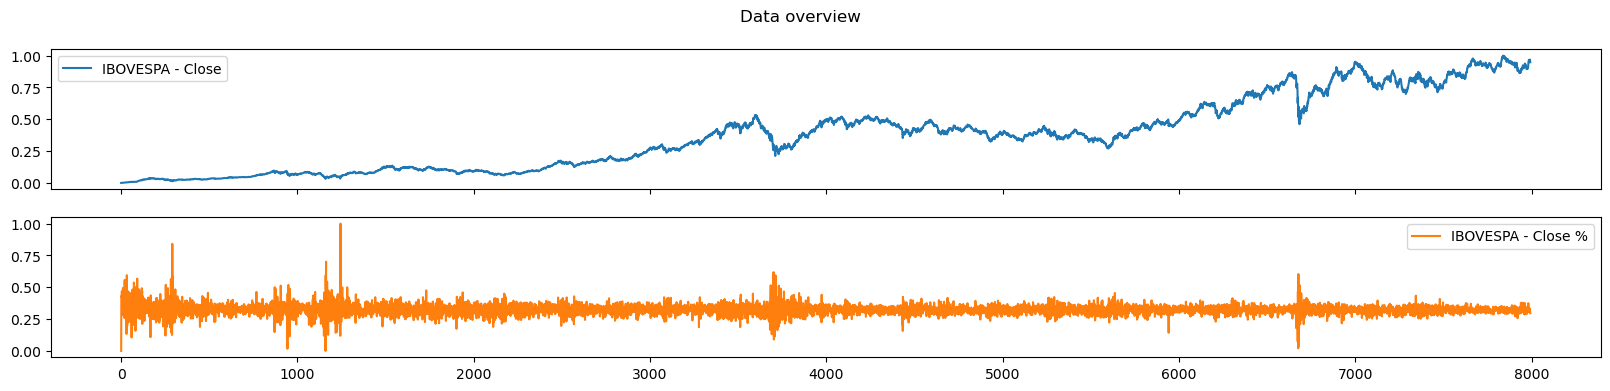

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

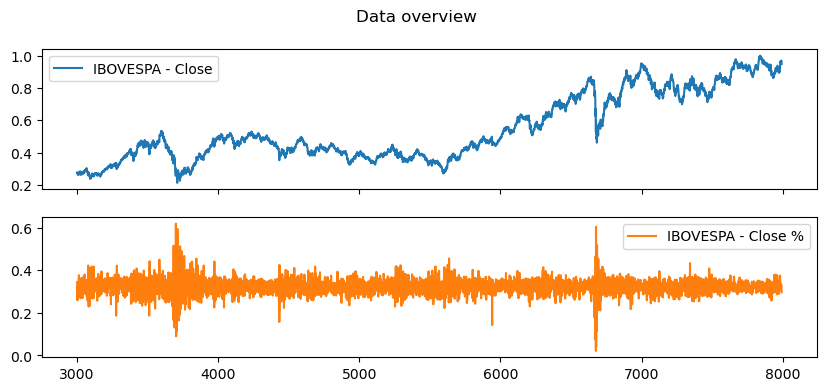

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

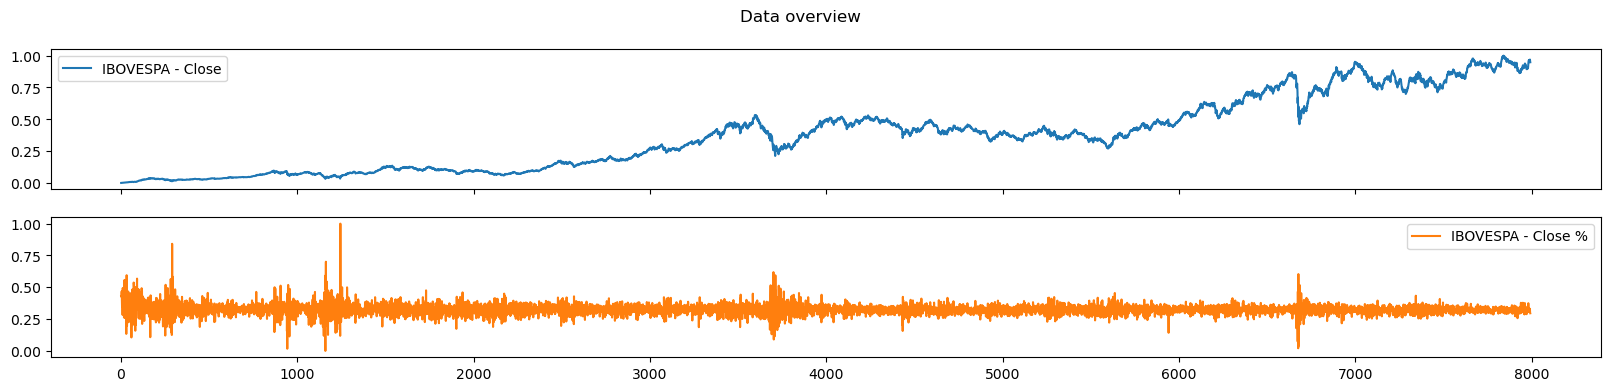

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

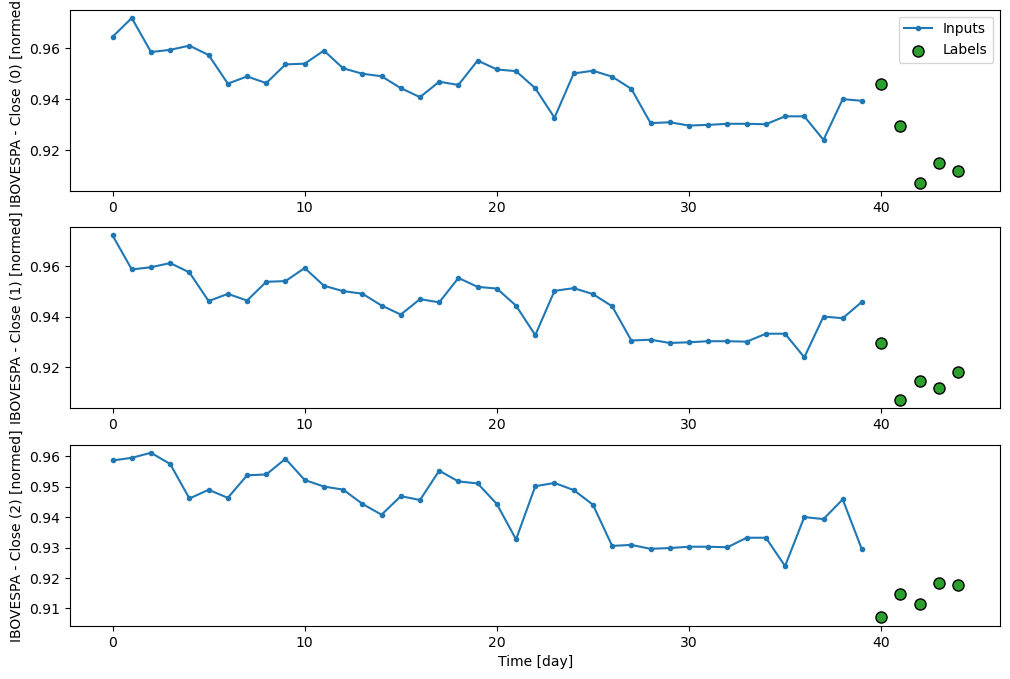

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10:16 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 92.1335 - mean_squared_error: 1.0239e-04 - root_mean_squared_error: 0.0100  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 77.6998 - mean_squared_error: 1.2658e-04 - root_mean_squared_error: 0.0111

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 71.6543 - mean_squared_error: 1.4090e-04 - root_mean_squared_error: 0.0117

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 66.1584 - mean_squared_error: 1.4084e-04 - root_mean_squared_error: 0.0118

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.3392 - mean_squared_error: 1.3621e-04 - root_mean_squared_error: 0.0116

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.1217 - mean_squared_error: 1.3023e-04 - root_mean_squared_error: 0.0113

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.5412 - mean_squared_error: 1.2599e-04 - root_mean_squared_error: 0.0111

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 50.7491 - mean_squared_error: 1.2819e-04 - root_mean_squared_error: 0.0112

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.4167 - mean_squared_error: 1.3056e-04 - root_mean_squared_error: 0.0114

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 46.5218 - mean_squared_error: 1.3352e-04 - root_mean_squared_error: 0.0115

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 45.3190 - mean_squared_error: 1.3732e-04 - root_mean_squared_error: 0.0116

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 43.9312 - mean_squared_error: 1.4526e-04 - root_mean_squared_error: 0.0119

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.6946 - mean_squared_error: 1.5442e-04 - root_mean_squared_error: 0.0123

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 41.5229 - mean_squared_error: 1.6137e-04 - root_mean_squared_error: 0.0125

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 40.4212 - mean_squared_error: 1.6673e-04 - root_mean_squared_error: 0.0127

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 39.6559 - mean_squared_error: 1.7021e-04 - root_mean_squared_error: 0.0129

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 38.7035 - mean_squared_error: 1.7404e-04 - root_mean_squared_error: 0.0130

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 37.8522 - mean_squared_error: 1.7762e-04 - root_mean_squared_error: 0.0131

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 37.0755 - mean_squared_error: 1.8132e-04 - root_mean_squared_error: 0.0133

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 36.4171 - mean_squared_error: 1.9155e-04 - root_mean_squared_error: 0.0136

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 35.8388 - mean_squared_error: 2.0620e-04 - root_mean_squared_error: 0.0140

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 35.2850 - mean_squared_error: 2.1935e-04 - root_mean_squared_error: 0.0144

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 34.8776 - mean_squared_error: 2.2797e-04 - root_mean_squared_error: 0.0146

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 34.3597 - mean_squared_error: 2.4003e-04 - root_mean_squared_error: 0.0150

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 33.9958 - mean_squared_error: 2.5134e-04 - root_mean_squared_error: 0.0153

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 33.6403 - mean_squared_error: 2.6204e-04 - root_mean_squared_error: 0.0156

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 33.2916 - mean_squared_error: 2.7197e-04 - root_mean_squared_error: 0.0158

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 32.8375 - mean_squared_error: 2.8458e-04 - root_mean_squared_error: 0.0162

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 32.5057 - mean_squared_error: 2.9391e-04 - root_mean_squared_error: 0.0164

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 32.0742 - mean_squared_error: 3.0617e-04 - root_mean_squared_error: 0.0167

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 31.6833 - mean_squared_error: 3.2991e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 31.3256 - mean_squared_error: 3.6011e-04 - root_mean_squared_error: 0.0178

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 30.9981 - mean_squared_error: 4.0539e-04 - root_mean_squared_error: 0.0186

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 30.7753 - mean_squared_error: 4.5631e-04 - root_mean_squared_error: 0.0193

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 30.4936 - mean_squared_error: 5.2789e-04 - root_mean_squared_error: 0.0204

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 30.2195 - mean_squared_error: 5.9617e-04 - root_mean_squared_error: 0.0213

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 29.9489 - mean_squared_error: 6.5917e-04 - root_mean_squared_error: 0.0222

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 29.6869 - mean_squared_error: 7.1979e-04 - root_mean_squared_error: 0.0231

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 29.4301 - mean_squared_error: 7.7688e-04 - root_mean_squared_error: 0.0239

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 29.1764 - mean_squared_error: 8.2953e-04 - root_mean_squared_error: 0.0247

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 28.9339 - mean_squared_error: 8.8074e-04 - root_mean_squared_error: 0.0254

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 28.6966 - mean_squared_error: 9.2841e-04 - root_mean_squared_error: 0.0261

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 28.4671 - mean_squared_error: 9.7417e-04 - root_mean_squared_error: 0.0267

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 28.2449 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0274    

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 28.0273 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0280

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 27.8176 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 27.6631 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 27.4636 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 27.2714 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 27.0851 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 26.9034 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 26.7266 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 26.5957 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 26.4234 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 26.2585 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 26.1413 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 25.9876 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 25.8745 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 25.7625 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0347

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 25.6147 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 25.4685 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 25.3596 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 25.2164 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366 - val_loss: 0.0572 - val_mean_absolute_error: 0.0572 - val_mean_absolute_percentage_error: 6.0471 - val_mean_squared_error: 0.0039 - val_root_mean_squared_error: 0.0623 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.6592 - mean_absolute_error: 0.6592 - mean_absolute_percentage_error: 8755.3799 - mean_squared_error: 0.4346 - root_mean_squared_error: 0.6592

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6610 - mean_absolute_error: 0.6610 - mean_absolute_percentage_error: 6717.7480 - mean_squared_error: 0.4370 - root_mean_squared_error: 0.6610 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6547 - mean_absolute_error: 0.6547 - mean_absolute_percentage_error: 5528.6919 - mean_squared_error: 0.4290 - root_mean_squared_error: 0.6549

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 4899.3481 - mean_squared_error: 0.4158 - root_mean_squared_error: 0.6446

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6276 - mean_absolute_error: 0.6276 - mean_absolute_percentage_error: 4358.9053 - mean_squared_error: 0.4171 - root_mean_squared_error: 0.6430

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6338 - mean_absolute_error: 0.6338 - mean_absolute_percentage_error: 4123.8062 - mean_squared_error: 0.4655 - root_mean_squared_error: 0.6762

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6348 - mean_absolute_error: 0.6348 - mean_absolute_percentage_error: 3918.6514 - mean_squared_error: 0.4901 - root_mean_squared_error: 0.6938

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.6308 - mean_absolute_error: 0.6308 - mean_absolute_percentage_error: 3732.6414 - mean_squared_error: 0.5000 - root_mean_squared_error: 0.7014

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6248 - mean_absolute_error: 0.6248 - mean_absolute_percentage_error: 3614.7983 - mean_squared_error: 0.5007 - root_mean_squared_error: 0.7024

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6132 - mean_absolute_error: 0.6132 - mean_absolute_percentage_error: 3448.8040 - mean_squared_error: 0.4968 - root_mean_squared_error: 0.7001

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.5994 - mean_absolute_error: 0.5994 - mean_absolute_percentage_error: 3295.6733 - mean_squared_error: 0.4892 - root_mean_squared_error: 0.6949

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5945 - mean_absolute_error: 0.5945 - mean_absolute_percentage_error: 3247.4316 - mean_squared_error: 0.4862 - root_mean_squared_error: 0.6928

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5895 - mean_absolute_error: 0.5895 - mean_absolute_percentage_error: 3200.5686 - mean_squared_error: 0.4830 - root_mean_squared_error: 0.6905

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 3155.0452 - mean_squared_error: 0.4796 - root_mean_squared_error: 0.6880

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5795 - mean_absolute_error: 0.5795 - mean_absolute_percentage_error: 3110.7976 - mean_squared_error: 0.4762 - root_mean_squared_error: 0.6855

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - mean_absolute_percentage_error: 3067.8267 - mean_squared_error: 0.4726 - root_mean_squared_error: 0.6828

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5644 - mean_absolute_error: 0.5644 - mean_absolute_percentage_error: 2985.4836 - mean_squared_error: 0.4654 - root_mean_squared_error: 0.6774

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5495 - mean_absolute_error: 0.5495 - mean_absolute_percentage_error: 2870.4031 - mean_squared_error: 0.4543 - root_mean_squared_error: 0.6688

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5446 - mean_absolute_error: 0.5446 - mean_absolute_percentage_error: 2834.1279 - mean_squared_error: 0.4506 - root_mean_squared_error: 0.6659

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 2731.0249 - mean_squared_error: 0.4396 - root_mean_squared_error: 0.6571

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.5123 - mean_absolute_error: 0.5123 - mean_absolute_percentage_error: 2605.5891 - mean_squared_error: 0.4253 - root_mean_squared_error: 0.6455

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4951 - mean_absolute_error: 0.4951 - mean_absolute_percentage_error: 2492.1477 - mean_squared_error: 0.4116 - root_mean_squared_error: 0.6340

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - mean_absolute_percentage_error: 2389.1421 - mean_squared_error: 0.3986 - root_mean_squared_error: 0.6229

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4677 - mean_absolute_error: 0.4677 - mean_absolute_percentage_error: 2317.9133 - mean_squared_error: 0.3893 - root_mean_squared_error: 0.6149

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 2230.0776 - mean_squared_error: 0.3776 - root_mean_squared_error: 0.6045

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4401 - mean_absolute_error: 0.4401 - mean_absolute_percentage_error: 2149.4639 - mean_squared_error: 0.3665 - root_mean_squared_error: 0.5945

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4276 - mean_absolute_error: 0.4276 - mean_absolute_percentage_error: 2075.2078 - mean_squared_error: 0.3560 - root_mean_squared_error: 0.5849

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 2006.5138 - mean_squared_error: 0.3462 - root_mean_squared_error: 0.5758

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.4048 - mean_absolute_error: 0.4048 - mean_absolute_percentage_error: 1942.7593 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1883.4236 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5586

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 1828.0454 - mean_squared_error: 0.3198 - root_mean_squared_error: 0.5506

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1788.8702 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5447

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3688 - mean_absolute_error: 0.3688 - mean_absolute_percentage_error: 1739.4983 - mean_squared_error: 0.3064 - root_mean_squared_error: 0.5373

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3625 - mean_absolute_error: 0.3625 - mean_absolute_percentage_error: 1704.4485 - mean_squared_error: 0.3010 - root_mean_squared_error: 0.5318

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1660.1265 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5249

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3469 - mean_absolute_error: 0.3469 - mean_absolute_percentage_error: 1618.3333 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5182

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1578.8484 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5117

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3346 - mean_absolute_error: 0.3346 - mean_absolute_percentage_error: 1550.6342 - mean_squared_error: 0.2768 - root_mean_squared_error: 0.5071

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3281 - mean_absolute_error: 0.3281 - mean_absolute_percentage_error: 1514.7661 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.5011

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1489.0857 - mean_squared_error: 0.2670 - root_mean_squared_error: 0.4967

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1456.3610 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4911

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1425.2542 - mean_squared_error: 0.2568 - root_mean_squared_error: 0.4857

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1402.9011 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4819

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1374.3013 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4768

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1347.0031 - mean_squared_error: 0.2442 - root_mean_squared_error: 0.4720

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1320.9196 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4673

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1295.9525 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4628

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1272.0314 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4584

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1249.0874 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4541

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2781 - mean_absolute_error: 0.2781 - mean_absolute_percentage_error: 1227.0565 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4500

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1205.8840 - mean_squared_error: 0.2210 - root_mean_squared_error: 0.4459

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1185.5187 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4420

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1165.9127 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4382

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1147.0255 - mean_squared_error: 0.2112 - root_mean_squared_error: 0.4345

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1128.8188 - mean_squared_error: 0.2082 - root_mean_squared_error: 0.4309

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1111.2594 - mean_squared_error: 0.2052 - root_mean_squared_error: 0.4274

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 1094.3094 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4240

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1077.9331 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4206

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2490 - mean_absolute_error: 0.2490 - mean_absolute_percentage_error: 1062.0997 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4174

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1046.7834 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4142

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2436 - mean_absolute_error: 0.2436 - mean_absolute_percentage_error: 1031.9547 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4111

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1021.1391 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4089

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1007.1127 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4059

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 993.5173 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.4030 

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 980.3281 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.4002

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2322 - mean_absolute_error: 0.2322 - mean_absolute_percentage_error: 967.5269 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3975

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 955.0964 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3948

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 943.0194 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3922

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 931.2798 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3896

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2238 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 919.8754 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3871 - val_loss: 0.1067 - val_mean_absolute_error: 0.1067 - val_mean_absolute_percentage_error: 11.3458 - val_mean_squared_error: 0.0121 - val_root_mean_squared_error: 0.1098 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.7152 - mean_absolute_error: 0.7152 - mean_absolute_percentage_error: 9495.8643 - mean_squared_error: 0.5116 - root_mean_squared_error: 0.7152

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7114 - mean_absolute_error: 0.7114 - mean_absolute_percentage_error: 6733.2388 - mean_squared_error: 0.5062 - root_mean_squared_error: 0.7114 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 5497.1919 - mean_squared_error: 0.4929 - root_mean_squared_error: 0.7020

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6872 - mean_absolute_error: 0.6872 - mean_absolute_percentage_error: 4857.4917 - mean_squared_error: 0.4741 - root_mean_squared_error: 0.6882

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6677 - mean_absolute_error: 0.6677 - mean_absolute_percentage_error: 4403.9854 - mean_squared_error: 0.4509 - root_mean_squared_error: 0.6704

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6436 - mean_absolute_error: 0.6436 - mean_absolute_percentage_error: 4039.2273 - mean_squared_error: 0.4255 - root_mean_squared_error: 0.6500

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.6156 - mean_absolute_error: 0.6156 - mean_absolute_percentage_error: 3729.7786 - mean_squared_error: 0.4001 - root_mean_squared_error: 0.6286

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5881 - mean_absolute_error: 0.5881 - mean_absolute_percentage_error: 3466.1001 - mean_squared_error: 0.3765 - root_mean_squared_error: 0.6079

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.5624 - mean_absolute_error: 0.5624 - mean_absolute_percentage_error: 3240.3298 - mean_squared_error: 0.3554 - root_mean_squared_error: 0.5887

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5381 - mean_absolute_error: 0.5381 - mean_absolute_percentage_error: 3044.6177 - mean_squared_error: 0.3363 - root_mean_squared_error: 0.5708

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5157 - mean_absolute_error: 0.5157 - mean_absolute_percentage_error: 2873.9319 - mean_squared_error: 0.3192 - root_mean_squared_error: 0.5543

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.5000 - mean_absolute_error: 0.5000 - mean_absolute_percentage_error: 2759.1985 - mean_squared_error: 0.3076 - root_mean_squared_error: 0.5427

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4853 - mean_absolute_error: 0.4853 - mean_absolute_percentage_error: 2654.3164 - mean_squared_error: 0.2968 - root_mean_squared_error: 0.5319

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4715 - mean_absolute_error: 0.4715 - mean_absolute_percentage_error: 2558.0164 - mean_squared_error: 0.2868 - root_mean_squared_error: 0.5216

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4543 - mean_absolute_error: 0.4543 - mean_absolute_percentage_error: 2441.1892 - mean_squared_error: 0.2746 - root_mean_squared_error: 0.5088

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 2335.8118 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4969

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 2240.2175 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4858

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 2153.1316 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4754

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3975 - mean_absolute_error: 0.3975 - mean_absolute_percentage_error: 2073.3716 - mean_squared_error: 0.2353 - root_mean_squared_error: 0.4657

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 2000.0146 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4566

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 1932.3027 - mean_squared_error: 0.2200 - root_mean_squared_error: 0.4480

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3643 - mean_absolute_error: 0.3643 - mean_absolute_percentage_error: 1869.5853 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4399

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 1811.3037 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4323

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1756.9773 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4250

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1718.5850 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4198

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 1682.0396 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4148

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1658.6378 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4116

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3232 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 1624.8823 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.4069

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1582.2115 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4008

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1551.8362 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3965

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1513.3274 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3910

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1476.9288 - mean_squared_error: 0.1697 - root_mean_squared_error: 0.3857

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1442.4993 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3807

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1409.8438 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3759

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2816 - mean_absolute_error: 0.2816 - mean_absolute_percentage_error: 1378.8121 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3713

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1349.2799 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3668

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1321.1355 - mean_squared_error: 0.1524 - root_mean_squared_error: 0.3625

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2685 - mean_absolute_error: 0.2685 - mean_absolute_percentage_error: 1300.8835 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3594

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1281.3226 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3564

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1256.2463 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3525

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1232.2487 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3488

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2530 - mean_absolute_error: 0.2530 - mean_absolute_percentage_error: 1209.2590 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3451

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1187.2123 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3416

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1166.0494 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3382

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 1145.7175 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3349

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 1126.1641 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3317

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1107.3468 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3286

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 1089.2239 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3256

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1071.7561 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3226

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1054.9080 - mean_squared_error: 0.1226 - root_mean_squared_error: 0.3198

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1038.6434 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3170

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1022.9310 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3143

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1007.7439 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3117

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 993.0526 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3092 

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 978.8321 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3067

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 965.0634 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3043

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 951.7264 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3019

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 938.7956 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.2997

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 926.2520 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.2975

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 914.0778 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2953

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 905.1791 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.2937

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 893.6108 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2916

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 882.3712 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2896

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 879.6167 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2891 - val_loss: 0.0519 - val_mean_absolute_error: 0.0519 - val_mean_absolute_percentage_error: 5.4947 - val_mean_squared_error: 0.0031 - val_root_mean_squared_error: 0.0561 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.4951 - mean_absolute_error: 0.4951 - mean_absolute_percentage_error: 6573.5278 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4951

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 4660.5317 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4925

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4849 - mean_absolute_error: 0.4849 - mean_absolute_percentage_error: 3801.5273 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4851

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4730 - mean_absolute_error: 0.4730 - mean_absolute_percentage_error: 3351.5647 - mean_squared_error: 0.2250 - root_mean_squared_error: 0.4740

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4563 - mean_absolute_error: 0.4563 - mean_absolute_percentage_error: 3026.8662 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4593

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 2760.7109 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4426

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4129 - mean_absolute_error: 0.4129 - mean_absolute_percentage_error: 2539.4814 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4263

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3979 - mean_absolute_error: 0.3979 - mean_absolute_percentage_error: 2397.5867 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.4149

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - mean_absolute_percentage_error: 2232.9968 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.4007

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 2091.8259 - mean_squared_error: 0.1559 - root_mean_squared_error: 0.3877

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1969.4016 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3758

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1887.7407 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3675

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 1790.0253 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3573

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1703.0917 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3479

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1625.2179 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3392

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1554.9656 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3312

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1491.2292 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3237

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1433.1130 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.3167

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1379.9050 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.3101

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1330.9752 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.3040

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1285.8063 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2982

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1243.9713 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2928

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1205.0969 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2876

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1168.8652 - mean_squared_error: 0.0899 - root_mean_squared_error: 0.2827

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 1135.0045 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2781

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1103.2850 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2737

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1073.5001 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2695

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 1045.4713 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2655

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 1025.5066 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2627

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 1000.1837 - mean_squared_error: 0.0772 - root_mean_squared_error: 0.2590

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 976.2338 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2555 

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 953.5454 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2521

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 932.0213 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2489

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 911.5640 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2458

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 892.0922 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2428

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 873.5314 - mean_squared_error: 0.0677 - root_mean_squared_error: 0.2400

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 855.8180 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2372

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 838.8948 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2346

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1665 - mean_absolute_error: 0.1665 - mean_absolute_percentage_error: 822.7050 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2320

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 807.2021 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2295

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 792.3411 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2271

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 778.0808 - mean_squared_error: 0.0605 - root_mean_squared_error: 0.2248

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 764.3860 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2226

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 751.2202 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2204

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 738.5535 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2183

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1500 - mean_absolute_error: 0.1500 - mean_absolute_percentage_error: 726.3582 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2162

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 714.6105 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2143

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 703.2844 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2124

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 692.3535 - mean_squared_error: 0.0540 - root_mean_squared_error: 0.2105

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 681.7958 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2087

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 671.5938 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2069

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1390 - mean_absolute_error: 0.1390 - mean_absolute_percentage_error: 661.7278 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2052

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 652.1810 - mean_squared_error: 0.0509 - root_mean_squared_error: 0.2036

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 642.9401 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2019

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 633.9917 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2004

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 625.3177 - mean_squared_error: 0.0489 - root_mean_squared_error: 0.1989

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 616.9053 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.1974

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 608.7423 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1960

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 600.8170 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.1946

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 593.1187 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.1932

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 585.6439 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.1919 - val_loss: 0.0189 - val_mean_absolute_error: 0.0189 - val_mean_absolute_percentage_error: 1.9952 - val_mean_squared_error: 5.3253e-04 - val_root_mean_squared_error: 0.0231 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 4260.4971 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.3210

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 2998.0662 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.3145 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 2417.9497 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.3037

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 2095.2456 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2900

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1854.8130 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2751

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1671.1187 - mean_squared_error: 0.0703 - root_mean_squared_error: 0.2618

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1526.0811 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2503

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1406.4556 - mean_squared_error: 0.0601 - root_mean_squared_error: 0.2400

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1306.6423 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2309

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1221.6919 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2228

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1165.9628 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2173

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 1100.1255 - mean_squared_error: 0.0477 - root_mean_squared_error: 0.2105

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1042.1694 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.2044

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 990.7038 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.1987 

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1649 - mean_absolute_error: 0.1649 - mean_absolute_percentage_error: 944.6599 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1935

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 903.1996 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1888

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 865.6606 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1843

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 831.5177 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1802

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 800.3151 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1764

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 771.6535 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1728

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 745.2157 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1694

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 720.7441 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1662

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 698.0188 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1632

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 676.8525 - mean_squared_error: 0.0297 - root_mean_squared_error: 0.1604

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 657.0840 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1577

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 638.5742 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1552

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 621.2003 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1528

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 604.8571 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1505

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 589.4523 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1483

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 574.9057 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1462

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 561.1458 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1442

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 548.1061 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1422

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 535.7287 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1404

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 523.9624 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1386

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 512.7610 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1369

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 502.0841 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1353

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 491.8950 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1337

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 482.1589 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1322

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 472.8444 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1308

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 463.9239 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1293

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 455.3719 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1280

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 447.1653 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1267

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 439.2831 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1254

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 431.7053 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1241

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 424.4144 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1229

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 417.3942 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1218

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 410.6289 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1206

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 405.7137 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1198

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 399.3614 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1188

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 393.2280 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1177

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 388.7648 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1170

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 382.9870 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1160

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 377.3975 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1150

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 371.9879 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1141

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 366.7493 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1132

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 361.6733 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1123

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 357.9684 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1116

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 354.3477 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1110

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 349.6454 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1102

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 346.2090 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1096

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 342.8474 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1090

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 338.4805 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1083 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267 - val_mean_absolute_percentage_error: 2.8264 - val_mean_squared_error: 8.9644e-04 - val_root_mean_squared_error: 0.0299 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 2052.6038 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1552

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 1545.8608 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1501 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 1176.4474 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1390

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 971.4202 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1277 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 841.8847 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1192

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 770.6365 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1141

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 712.0020 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1095

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 663.1235 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1055

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 608.6757 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1009

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 563.5337 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0968

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 525.5649 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0931

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 493.1469 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0899

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 465.0160 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0871

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 440.2984 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0844

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 418.3903 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0821

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 398.8175 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0799

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 385.4474 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0784

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 369.1250 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0765

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 357.8791 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0752

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 347.3913 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0739

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 334.4454 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0723

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 325.4309 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0712

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 314.2400 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0698

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 303.8901 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 294.2855 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0672

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 285.3433 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0661

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 276.9949 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0650

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 269.1800 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 261.8460 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 256.6348 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0622

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 251.6527 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0615

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 246.8843 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0609

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 242.3178 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0602

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 239.3786 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0598

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 235.1179 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0592

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 231.0248 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 225.8104 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 220.8538 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0572

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 217.2939 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 213.8607 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 210.5479 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 207.3488 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 204.2574 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0548

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 200.2931 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0542

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 196.4979 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 192.8605 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0531

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 189.3713 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0525

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 186.8467 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 183.5959 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0516

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 180.4697 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 177.4611 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0507

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 174.5630 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0502

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 171.7692 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 169.0741 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0494

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 166.4726 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0490

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 163.9599 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 161.5310 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 159.1815 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0478

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 156.9084 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0475

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 154.7072 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0471

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 152.5744 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 150.5066 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 148.5012 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 146.5549 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 144.6653 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0456

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 143.2854 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0454 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349 - val_mean_absolute_percentage_error: 3.7035 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0374 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1652.9124 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1254

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1149.2828 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1195

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 895.7337 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1096 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 748.4355 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1008

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 654.0388 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0944

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 583.9240 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0890

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 529.5389 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0845

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 485.5595 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0807

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 449.1729 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0773

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 418.5313 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0744

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 392.3458 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 369.6257 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0694

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 349.7124 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0673

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 332.0917 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0654

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 316.3732 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0636

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 302.2547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 289.4948 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 277.9031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0591

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 267.3180 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 257.6052 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 248.6599 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0555

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 240.3908 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 232.7207 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 225.5853 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 218.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 212.7076 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 206.8757 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 201.3964 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 197.4985 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 192.5611 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 187.8991 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 183.4891 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 180.3329 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 176.3130 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 173.4288 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 170.6494 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 167.0972 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 163.7085 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 160.4715 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 157.3752 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 154.4105 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 151.5688 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 148.8426 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 146.2248 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 143.7085 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 141.2881 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 138.9577 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 136.7120 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 134.5463 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 132.4561 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 130.4377 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 128.4873 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 126.6012 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 124.7767 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 123.0109 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 121.3010 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 119.6439 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 118.0374 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 116.4789 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 114.9662 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 113.4978 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 113.1380 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152 - val_mean_absolute_percentage_error: 1.6077 - val_mean_squared_error: 3.3921e-04 - val_root_mean_squared_error: 0.0184 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 1089.4829 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0824

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 745.5161 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0759 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 601.7369 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 494.8405 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 428.3619 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 380.5831 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 343.8489 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0524

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 314.4428 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 290.3379 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 270.1537 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 253.0343 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 238.2434 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 225.3000 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 213.8609 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 203.6717 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 194.5294 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 186.2764 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 178.7867 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 171.9549 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 165.6915 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 159.9266 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 155.8943 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 153.3320 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 148.4851 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 145.0730 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 140.7935 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 137.7700 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 133.9628 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 130.3892 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 127.8494 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 125.4202 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 123.0959 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 120.8702 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 119.4376 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 118.7362 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 118.0443 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 116.6880 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 116.0231 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 115.3669 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 113.4497 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 111.6042 - mean_squared_error: 9.8836e-04 - root_mean_squared_error: 0.0285

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 111.0042 - mean_squared_error: 9.8398e-04 - root_mean_squared_error: 0.0284

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 109.8259 - mean_squared_error: 9.7539e-04 - root_mean_squared_error: 0.0283

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 108.1113 - mean_squared_error: 9.6292e-04 - root_mean_squared_error: 0.0281

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 107.0020 - mean_squared_error: 9.5489e-04 - root_mean_squared_error: 0.0280

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 105.9183 - mean_squared_error: 9.4703e-04 - root_mean_squared_error: 0.0279

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 104.8595 - mean_squared_error: 9.3937e-04 - root_mean_squared_error: 0.0278

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 103.8245 - mean_squared_error: 9.3186e-04 - root_mean_squared_error: 0.0276

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 102.3146 - mean_squared_error: 9.2087e-04 - root_mean_squared_error: 0.0275

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 100.8536 - mean_squared_error: 9.1020e-04 - root_mean_squared_error: 0.0273

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 99.4393 - mean_squared_error: 8.9983e-04 - root_mean_squared_error: 0.0272 

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 98.0692 - mean_squared_error: 8.8974e-04 - root_mean_squared_error: 0.0270

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 97.1793 - mean_squared_error: 8.8317e-04 - root_mean_squared_error: 0.0269

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 95.8784 - mean_squared_error: 8.7355e-04 - root_mean_squared_error: 0.0268

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 94.6168 - mean_squared_error: 8.6422e-04 - root_mean_squared_error: 0.0266

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.7964 - mean_squared_error: 8.5814e-04 - root_mean_squared_error: 0.0265

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 92.9919 - mean_squared_error: 8.5216e-04 - root_mean_squared_error: 0.0264

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 91.8143 - mean_squared_error: 8.4339e-04 - root_mean_squared_error: 0.0263

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 91.0480 - mean_squared_error: 8.3769e-04 - root_mean_squared_error: 0.0262

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.2962 - mean_squared_error: 8.3208e-04 - root_mean_squared_error: 0.0261

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.5583 - mean_squared_error: 8.2657e-04 - root_mean_squared_error: 0.0260

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 88.8339 - mean_squared_error: 8.2116e-04 - root_mean_squared_error: 0.0260

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 87.4243 - mean_squared_error: 8.1061e-04 - root_mean_squared_error: 0.0258

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 86.3998 - mean_squared_error: 8.0292e-04 - root_mean_squared_error: 0.0257

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.0754 - mean_squared_error: 7.9297e-04 - root_mean_squared_error: 0.0255

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 83.7961 - mean_squared_error: 7.8338e-04 - root_mean_squared_error: 0.0254

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.1727 - mean_squared_error: 7.7872e-04 - root_mean_squared_error: 0.0253

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.2571 - mean_squared_error: 7.7188e-04 - root_mean_squared_error: 0.0252

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.3639 - mean_squared_error: 7.6522e-04 - root_mean_squared_error: 0.0251

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 80.4926 - mean_squared_error: 7.5885e-04 - root_mean_squared_error: 0.0250

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 79.6427 - mean_squared_error: 7.5294e-04 - root_mean_squared_error: 0.0249

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 78.8130 - mean_squared_error: 7.4723e-04 - root_mean_squared_error: 0.0248

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 78.2709 - mean_squared_error: 7.4357e-04 - root_mean_squared_error: 0.0247

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 77.4733 - mean_squared_error: 7.3820e-04 - root_mean_squared_error: 0.0246

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 76.6939 - mean_squared_error: 7.3301e-04 - root_mean_squared_error: 0.0246

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 75.6823 - mean_squared_error: 7.2640e-04 - root_mean_squared_error: 0.0245

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 74.7006 - mean_squared_error: 7.2005e-04 - root_mean_squared_error: 0.0244

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 73.7474 - mean_squared_error: 7.1394e-04 - root_mean_squared_error: 0.0243

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 72.8222 - mean_squared_error: 7.0807e-04 - root_mean_squared_error: 0.0242 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1348 - val_mean_squared_error: 1.7002e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 1030.8086 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0784

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 842.0415 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0755  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 644.0876 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 530.0493 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 444.6725 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0576

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 388.0860 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 347.0703 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0509

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 315.1569 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 289.4576 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 268.2541 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 250.3754 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 235.0608 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 221.7401 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 210.0445 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 199.6797 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 194.9246 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 188.2624 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 182.1077 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 176.4059 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 169.4361 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 164.6267 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 158.6885 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 153.2215 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 149.3953 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 145.7802 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 142.3598 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 139.1182 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 136.0407 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 132.1723 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.4318 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 125.9729 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 122.7185 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.4010 - mean_squared_error: 9.9084e-04 - root_mean_squared_error: 0.0288

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 117.4636 - mean_squared_error: 9.6814e-04 - root_mean_squared_error: 0.0284

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 114.6872 - mean_squared_error: 9.4691e-04 - root_mean_squared_error: 0.0281

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 112.0569 - mean_squared_error: 9.2690e-04 - root_mean_squared_error: 0.0278

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 110.1725 - mean_squared_error: 9.1262e-04 - root_mean_squared_error: 0.0275

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 107.7696 - mean_squared_error: 8.9449e-04 - root_mean_squared_error: 0.0272

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 105.4827 - mean_squared_error: 8.7727e-04 - root_mean_squared_error: 0.0269

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 103.3037 - mean_squared_error: 8.6090e-04 - root_mean_squared_error: 0.0267

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 101.2252 - mean_squared_error: 8.4538e-04 - root_mean_squared_error: 0.0264

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 99.7278 - mean_squared_error: 8.3423e-04 - root_mean_squared_error: 0.0262 

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 97.8078 - mean_squared_error: 8.1992e-04 - root_mean_squared_error: 0.0260

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.4220 - mean_squared_error: 8.0959e-04 - root_mean_squared_error: 0.0258

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.0801 - mean_squared_error: 7.9958e-04 - root_mean_squared_error: 0.0256

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 93.3554 - mean_squared_error: 7.8669e-04 - root_mean_squared_error: 0.0254

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 92.1079 - mean_squared_error: 7.7736e-04 - root_mean_squared_error: 0.0253

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 90.5028 - mean_squared_error: 7.6541e-04 - root_mean_squared_error: 0.0251

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.3401 - mean_squared_error: 7.5675e-04 - root_mean_squared_error: 0.0249

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.2109 - mean_squared_error: 7.4833e-04 - root_mean_squared_error: 0.0248

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 87.1140 - mean_squared_error: 7.4017e-04 - root_mean_squared_error: 0.0246

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 86.0479 - mean_squared_error: 7.3227e-04 - root_mean_squared_error: 0.0245

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.6718 - mean_squared_error: 7.2208e-04 - root_mean_squared_error: 0.0243

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.3450 - mean_squared_error: 7.1228e-04 - root_mean_squared_error: 0.0241

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.0646 - mean_squared_error: 7.0285e-04 - root_mean_squared_error: 0.0240

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.8282 - mean_squared_error: 6.9381e-04 - root_mean_squared_error: 0.0238

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.9285 - mean_squared_error: 6.8730e-04 - root_mean_squared_error: 0.0237

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.7639 - mean_squared_error: 6.7896e-04 - root_mean_squared_error: 0.0235

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.6372 - mean_squared_error: 6.7094e-04 - root_mean_squared_error: 0.0234

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.5470 - mean_squared_error: 6.6359e-04 - root_mean_squared_error: 0.0233

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.4914 - mean_squared_error: 6.5666e-04 - root_mean_squared_error: 0.0232

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.4686 - mean_squared_error: 6.5010e-04 - root_mean_squared_error: 0.0231

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.4768 - mean_squared_error: 6.4383e-04 - root_mean_squared_error: 0.0230

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.5148 - mean_squared_error: 6.3789e-04 - root_mean_squared_error: 0.0229

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 71.5812 - mean_squared_error: 6.3220e-04 - root_mean_squared_error: 0.0228

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 70.6745 - mean_squared_error: 6.2675e-04 - root_mean_squared_error: 0.0227

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 69.7944 - mean_squared_error: 6.2154e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0845 - val_mean_squared_error: 1.6027e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 1215.0303 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0935

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 831.5151 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0866 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 637.5496 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 533.4099 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0714

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 480.9939 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0678

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 439.5045 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 396.2999 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0614

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 361.8903 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0586

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 333.7373 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0561

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 310.2286 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0539

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 290.2708 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0520

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 273.0559 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 258.0359 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0487

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 244.7948 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 233.0167 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 222.4632 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 212.9550 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 204.3474 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0428

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 196.5168 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 189.3519 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 182.7613 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 176.6723 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 171.0265 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 165.7760 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 160.8784 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 156.2988 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 152.0048 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 147.9700 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 144.1714 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 141.4649 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 138.0337 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 135.5826 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 134.0027 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 131.7096 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 129.5036 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 128.0788 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 126.6891 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 124.6672 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 122.0824 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 119.6166 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 117.2612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 115.0082 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 112.8511 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 110.7834 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 108.7996 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 106.8952 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 105.0647 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 103.3041 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 101.6093 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 99.9763 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291 

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 98.4017 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 96.8820 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 95.4148 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 93.9972 - mean_squared_error: 9.9857e-04 - root_mean_squared_error: 0.0282

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 92.6265 - mean_squared_error: 9.8550e-04 - root_mean_squared_error: 0.0280

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 91.3002 - mean_squared_error: 9.7302e-04 - root_mean_squared_error: 0.0278

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 90.0169 - mean_squared_error: 9.6134e-04 - root_mean_squared_error: 0.0277

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 89.0810 - mean_squared_error: 9.5292e-04 - root_mean_squared_error: 0.0275

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 88.4692 - mean_squared_error: 9.4745e-04 - root_mean_squared_error: 0.0275

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.1669 - mean_squared_error: 9.4475e-04 - root_mean_squared_error: 0.0274

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 87.5692 - mean_squared_error: 9.3944e-04 - root_mean_squared_error: 0.0273

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 86.6897 - mean_squared_error: 9.3167e-04 - root_mean_squared_error: 0.0272

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.1145 - mean_squared_error: 9.2666e-04 - root_mean_squared_error: 0.0272

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 85.5478 - mean_squared_error: 9.2173e-04 - root_mean_squared_error: 0.0271

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 85.2677 - mean_squared_error: 9.1930e-04 - root_mean_squared_error: 0.0270

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 84.7136 - mean_squared_error: 9.1451e-04 - root_mean_squared_error: 0.0270

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 83.8975 - mean_squared_error: 9.0748e-04 - root_mean_squared_error: 0.0269

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 83.0992 - mean_squared_error: 9.0067e-04 - root_mean_squared_error: 0.0268

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 82.5773 - mean_squared_error: 8.9624e-04 - root_mean_squared_error: 0.0267 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1046 - val_mean_squared_error: 1.6379e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 1148.2935 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0874

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 786.2522 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 637.1965 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0743

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 545.4891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 484.9178 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 453.1124 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0631

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 438.9673 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 425.8973 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 413.7895 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 402.5237 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 391.9815 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 382.0490 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 355.4898 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 332.9145 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0537

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 307.5413 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0515

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 286.2901 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0496

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 268.2196 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0478

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 252.5888 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 238.9203 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0449

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 226.8423 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 216.0820 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 206.4272 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 197.7179 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0404

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 189.8247 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 182.6322 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 176.0391 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 172.9422 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 168.5248 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 164.3567 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 159.1516 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 154.3087 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 150.8907 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 147.6410 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 144.5463 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 141.5952 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 138.7781 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 136.0858 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 133.5097 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 130.2450 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 127.1582 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 124.2331 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 121.4565 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 118.8169 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 116.3037 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 113.9084 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 111.6225 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 109.4383 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 107.3486 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 105.3473 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 103.4284 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 101.5873 - mean_squared_error: 9.8410e-04 - root_mean_squared_error: 0.0282

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 99.8192 - mean_squared_error: 9.6830e-04 - root_mean_squared_error: 0.0279 

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 98.1195 - mean_squared_error: 9.5310e-04 - root_mean_squared_error: 0.0277

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 96.4844 - mean_squared_error: 9.3851e-04 - root_mean_squared_error: 0.0275

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 95.6899 - mean_squared_error: 9.3144e-04 - root_mean_squared_error: 0.0273

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 94.5257 - mean_squared_error: 9.2108e-04 - root_mean_squared_error: 0.0272

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 93.3931 - mean_squared_error: 9.1101e-04 - root_mean_squared_error: 0.0270

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 92.2908 - mean_squared_error: 9.0123e-04 - root_mean_squared_error: 0.0269

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 91.2175 - mean_squared_error: 8.9172e-04 - root_mean_squared_error: 0.0267

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 90.1722 - mean_squared_error: 8.8250e-04 - root_mean_squared_error: 0.0266

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.8201 - mean_squared_error: 8.7064e-04 - root_mean_squared_error: 0.0264

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 87.5133 - mean_squared_error: 8.5929e-04 - root_mean_squared_error: 0.0262

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 86.2492 - mean_squared_error: 8.4835e-04 - root_mean_squared_error: 0.0260

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 85.3283 - mean_squared_error: 8.4063e-04 - root_mean_squared_error: 0.0259

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 84.4296 - mean_squared_error: 8.3324e-04 - root_mean_squared_error: 0.0258

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 83.5521 - mean_squared_error: 8.2609e-04 - root_mean_squared_error: 0.0257

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 82.6951 - mean_squared_error: 8.1916e-04 - root_mean_squared_error: 0.0256

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 82.1347 - mean_squared_error: 8.1465e-04 - root_mean_squared_error: 0.0255

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 81.8577 - mean_squared_error: 8.1243e-04 - root_mean_squared_error: 0.0255

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 81.5828 - mean_squared_error: 8.1023e-04 - root_mean_squared_error: 0.0254

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 81.3101 - mean_squared_error: 8.0805e-04 - root_mean_squared_error: 0.0254

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 80.5041 - mean_squared_error: 8.0168e-04 - root_mean_squared_error: 0.0253

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 79.4573 - mean_squared_error: 7.9347e-04 - root_mean_squared_error: 0.0252

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 78.4408 - mean_squared_error: 7.8555e-04 - root_mean_squared_error: 0.0251

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 77.4543 - mean_squared_error: 7.7791e-04 - root_mean_squared_error: 0.0249 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1504 - val_mean_squared_error: 1.7354e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 1035.0101 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0793

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 703.9214 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0726  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 536.5959 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 448.5911 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 390.8381 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 358.2582 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0528

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 323.6391 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 295.9670 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0477

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 273.2979 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0457

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 258.7467 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 245.8921 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 234.4270 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 220.9185 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 209.0769 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 198.5975 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 191.4923 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 182.8757 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 175.1047 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 168.0607 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 163.1936 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 157.1850 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 151.6634 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 146.5722 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 141.8582 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 137.4782 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 133.3950 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 129.5795 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 126.0035 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 122.6447 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.4837 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 116.5037 - mean_squared_error: 9.8484e-04 - root_mean_squared_error: 0.0284

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 113.6907 - mean_squared_error: 9.6245e-04 - root_mean_squared_error: 0.0281

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 111.0285 - mean_squared_error: 9.4134e-04 - root_mean_squared_error: 0.0277

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.5041 - mean_squared_error: 9.2140e-04 - root_mean_squared_error: 0.0274

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 106.1066 - mean_squared_error: 9.0254e-04 - root_mean_squared_error: 0.0271

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 103.8259 - mean_squared_error: 8.8461e-04 - root_mean_squared_error: 0.0268

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 101.6538 - mean_squared_error: 8.6756e-04 - root_mean_squared_error: 0.0265

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 99.5828 - mean_squared_error: 8.5140e-04 - root_mean_squared_error: 0.0263 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 97.6056 - mean_squared_error: 8.3602e-04 - root_mean_squared_error: 0.0260

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.7154 - mean_squared_error: 8.2132e-04 - root_mean_squared_error: 0.0258

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.9063 - mean_squared_error: 8.0725e-04 - root_mean_squared_error: 0.0255

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 92.1730 - mean_squared_error: 7.9375e-04 - root_mean_squared_error: 0.0253

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.5106 - mean_squared_error: 7.8079e-04 - root_mean_squared_error: 0.0251

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 88.9154 - mean_squared_error: 7.6842e-04 - root_mean_squared_error: 0.0249

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.3828 - mean_squared_error: 7.5654e-04 - root_mean_squared_error: 0.0247

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.9091 - mean_squared_error: 7.4512e-04 - root_mean_squared_error: 0.0245

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.4912 - mean_squared_error: 7.3419e-04 - root_mean_squared_error: 0.0243

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 83.1256 - mean_squared_error: 7.2367e-04 - root_mean_squared_error: 0.0241

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.8091 - mean_squared_error: 7.1356e-04 - root_mean_squared_error: 0.0239

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.5391 - mean_squared_error: 7.0383e-04 - root_mean_squared_error: 0.0238

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.3132 - mean_squared_error: 6.9452e-04 - root_mean_squared_error: 0.0236

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.1291 - mean_squared_error: 6.8563e-04 - root_mean_squared_error: 0.0234

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.2672 - mean_squared_error: 6.7922e-04 - root_mean_squared_error: 0.0233

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.4265 - mean_squared_error: 6.7300e-04 - root_mean_squared_error: 0.0232

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.6064 - mean_squared_error: 6.6707e-04 - root_mean_squared_error: 0.0231

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.5441 - mean_squared_error: 6.5974e-04 - root_mean_squared_error: 0.0230

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.5153 - mean_squared_error: 6.5276e-04 - root_mean_squared_error: 0.0229

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.5182 - mean_squared_error: 6.4609e-04 - root_mean_squared_error: 0.0228

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.5515 - mean_squared_error: 6.3973e-04 - root_mean_squared_error: 0.0227

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.6138 - mean_squared_error: 6.3368e-04 - root_mean_squared_error: 0.0226

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.7036 - mean_squared_error: 6.2787e-04 - root_mean_squared_error: 0.0225

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.0382 - mean_squared_error: 6.2369e-04 - root_mean_squared_error: 0.0224

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.3880 - mean_squared_error: 6.1963e-04 - root_mean_squared_error: 0.0224 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0803 - val_mean_squared_error: 1.5856e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1060.1238 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0813

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 724.3074 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0751 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 554.0095 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 482.1134 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 418.1583 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 382.1618 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 344.5939 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0531

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 314.7605 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0507

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 290.3742 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 270.0206 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0467

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 261.0482 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0459

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 252.7512 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 241.3886 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 227.9506 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 216.1223 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 205.6148 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0403

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 196.2130 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 187.7499 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 181.9369 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 174.8086 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 168.2962 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 162.3173 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 158.1445 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 154.2101 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 149.2990 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 144.7324 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 141.5104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 137.4606 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 133.6655 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 130.1009 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 126.7464 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 123.5834 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 120.5981 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 117.7733 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 115.0951 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 112.5515 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 110.1321 - mean_squared_error: 9.9475e-04 - root_mean_squared_error: 0.0286

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 107.8276 - mean_squared_error: 9.7541e-04 - root_mean_squared_error: 0.0283

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 105.6304 - mean_squared_error: 9.5705e-04 - root_mean_squared_error: 0.0280

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 104.0481 - mean_squared_error: 9.4386e-04 - root_mean_squared_error: 0.0278

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 102.5188 - mean_squared_error: 9.3112e-04 - root_mean_squared_error: 0.0276

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.0395 - mean_squared_error: 9.1879e-04 - root_mean_squared_error: 0.0274

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 99.1408 - mean_squared_error: 9.0297e-04 - root_mean_squared_error: 0.0271 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.7690 - mean_squared_error: 8.9152e-04 - root_mean_squared_error: 0.0270

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 96.8780 - mean_squared_error: 8.8408e-04 - root_mean_squared_error: 0.0268

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 95.5756 - mean_squared_error: 8.7320e-04 - root_mean_squared_error: 0.0267

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.3127 - mean_squared_error: 8.6269e-04 - root_mean_squared_error: 0.0265

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.0871 - mean_squared_error: 8.5250e-04 - root_mean_squared_error: 0.0263

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.8972 - mean_squared_error: 8.4260e-04 - root_mean_squared_error: 0.0261

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.7414 - mean_squared_error: 8.3298e-04 - root_mean_squared_error: 0.0260

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.2511 - mean_squared_error: 8.2063e-04 - root_mean_squared_error: 0.0258

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 87.8154 - mean_squared_error: 8.0874e-04 - root_mean_squared_error: 0.0256

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 86.7726 - mean_squared_error: 8.0013e-04 - root_mean_squared_error: 0.0254

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 85.7575 - mean_squared_error: 7.9175e-04 - root_mean_squared_error: 0.0253

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 84.7688 - mean_squared_error: 7.8360e-04 - root_mean_squared_error: 0.0252

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 83.8058 - mean_squared_error: 7.7571e-04 - root_mean_squared_error: 0.0250

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.8674 - mean_squared_error: 7.6806e-04 - root_mean_squared_error: 0.0249

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.9527 - mean_squared_error: 7.6067e-04 - root_mean_squared_error: 0.0248

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.7679 - mean_squared_error: 7.5112e-04 - root_mean_squared_error: 0.0246

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.6216 - mean_squared_error: 7.4215e-04 - root_mean_squared_error: 0.0245

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 78.7862 - mean_squared_error: 7.3582e-04 - root_mean_squared_error: 0.0244

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 77.7028 - mean_squared_error: 7.2773e-04 - root_mean_squared_error: 0.0242

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.6528 - mean_squared_error: 7.1998e-04 - root_mean_squared_error: 0.0241

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 75.6346 - mean_squared_error: 7.1257e-04 - root_mean_squared_error: 0.0240

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 74.6467 - mean_squared_error: 7.0548e-04 - root_mean_squared_error: 0.0239

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 73.6878 - mean_squared_error: 6.9868e-04 - root_mean_squared_error: 0.0238

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 72.7564 - mean_squared_error: 6.9216e-04 - root_mean_squared_error: 0.0237

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 72.3015 - mean_squared_error: 6.8898e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1054 - val_mean_squared_error: 1.6274e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 907.5789 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0701

  5/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 615.7134 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0640 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 529.4942 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 425.7155 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 378.0662 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0511

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 364.8487 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 321.9879 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 289.7199 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0444

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 270.1865 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0428

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 253.4875 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0414

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 234.6697 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 218.8294 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 205.2868 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 196.3211 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 188.2084 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 180.8325 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 174.0879 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 167.8965 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 162.1888 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 155.2366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 148.9361 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 144.5845 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 139.2159 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 135.4780 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 134.2827 - mean_squared_error: 9.9948e-04 - root_mean_squared_error: 0.0292

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 133.1115 - mean_squared_error: 9.9087e-04 - root_mean_squared_error: 0.0290

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 131.9636 - mean_squared_error: 9.8243e-04 - root_mean_squared_error: 0.0289

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 129.7345 - mean_squared_error: 9.6603e-04 - root_mean_squared_error: 0.0286

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 127.5895 - mean_squared_error: 9.5025e-04 - root_mean_squared_error: 0.0284

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 125.5242 - mean_squared_error: 9.3506e-04 - root_mean_squared_error: 0.0281

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 123.5340 - mean_squared_error: 9.2042e-04 - root_mean_squared_error: 0.0278

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 119.7627 - mean_squared_error: 8.9271e-04 - root_mean_squared_error: 0.0274

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.1019 - mean_squared_error: 8.7319e-04 - root_mean_squared_error: 0.0270

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 113.7575 - mean_squared_error: 8.4873e-04 - root_mean_squared_error: 0.0266

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.6233 - mean_squared_error: 8.2585e-04 - root_mean_squared_error: 0.0262

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 108.3986 - mean_squared_error: 8.0968e-04 - root_mean_squared_error: 0.0259

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 105.5867 - mean_squared_error: 7.8943e-04 - root_mean_squared_error: 0.0255

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.9365 - mean_squared_error: 7.7056e-04 - root_mean_squared_error: 0.0252

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.4368 - mean_squared_error: 7.5315e-04 - root_mean_squared_error: 0.0249

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 98.0725 - mean_squared_error: 7.3678e-04 - root_mean_squared_error: 0.0246 

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 95.8314 - mean_squared_error: 7.2132e-04 - root_mean_squared_error: 0.0243

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 93.7038 - mean_squared_error: 7.0672e-04 - root_mean_squared_error: 0.0241

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.6807 - mean_squared_error: 6.9286e-04 - root_mean_squared_error: 0.0238

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 90.2270 - mean_squared_error: 6.8290e-04 - root_mean_squared_error: 0.0236

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.3689 - mean_squared_error: 6.7025e-04 - root_mean_squared_error: 0.0234

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.5961 - mean_squared_error: 6.5824e-04 - root_mean_squared_error: 0.0232

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.9024 - mean_squared_error: 6.4680e-04 - root_mean_squared_error: 0.0229

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.2822 - mean_squared_error: 6.3584e-04 - root_mean_squared_error: 0.0227

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.7307 - mean_squared_error: 6.2534e-04 - root_mean_squared_error: 0.0225

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.2433 - mean_squared_error: 6.1526e-04 - root_mean_squared_error: 0.0223

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.5225 - mean_squared_error: 6.1038e-04 - root_mean_squared_error: 0.0223

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.1677 - mean_squared_error: 6.0798e-04 - root_mean_squared_error: 0.0222

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.4688 - mean_squared_error: 6.0328e-04 - root_mean_squared_error: 0.0221

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 77.4466 - mean_squared_error: 5.9640e-04 - root_mean_squared_error: 0.0220

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.7817 - mean_squared_error: 5.9192e-04 - root_mean_squared_error: 0.0219

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.1297 - mean_squared_error: 5.8753e-04 - root_mean_squared_error: 0.0218

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 75.4903 - mean_squared_error: 5.8323e-04 - root_mean_squared_error: 0.0217

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.8632 - mean_squared_error: 5.7903e-04 - root_mean_squared_error: 0.0217

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.9446 - mean_squared_error: 5.7290e-04 - root_mean_squared_error: 0.0215

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.3463 - mean_squared_error: 5.6891e-04 - root_mean_squared_error: 0.0215

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.7590 - mean_squared_error: 5.6499e-04 - root_mean_squared_error: 0.0214

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.8978 - mean_squared_error: 5.5927e-04 - root_mean_squared_error: 0.0213

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.0595 - mean_squared_error: 5.5371e-04 - root_mean_squared_error: 0.0212

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.2431 - mean_squared_error: 5.4833e-04 - root_mean_squared_error: 0.0211

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.4480 - mean_squared_error: 5.4314e-04 - root_mean_squared_error: 0.0210

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.6732 - mean_squared_error: 5.3813e-04 - root_mean_squared_error: 0.0209

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.9179 - mean_squared_error: 5.3330e-04 - root_mean_squared_error: 0.0208

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.1812 - mean_squared_error: 5.2862e-04 - root_mean_squared_error: 0.0207

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.4625 - mean_squared_error: 5.2417e-04 - root_mean_squared_error: 0.0206

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.7616 - mean_squared_error: 5.2010e-04 - root_mean_squared_error: 0.0205

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.0773 - mean_squared_error: 5.1617e-04 - root_mean_squared_error: 0.0204

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.4092 - mean_squared_error: 5.1241e-04 - root_mean_squared_error: 0.0204

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.7565 - mean_squared_error: 5.0877e-04 - root_mean_squared_error: 0.0203

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.1187 - mean_squared_error: 5.0526e-04 - root_mean_squared_error: 0.0203

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.4954 - mean_squared_error: 5.0192e-04 - root_mean_squared_error: 0.0202

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.8859 - mean_squared_error: 4.9868e-04 - root_mean_squared_error: 0.0201

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.2900 - mean_squared_error: 4.9556e-04 - root_mean_squared_error: 0.0201

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.7070 - mean_squared_error: 4.9255e-04 - root_mean_squared_error: 0.0200

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.1371 - mean_squared_error: 4.8963e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0804 - val_mean_squared_error: 1.5763e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 999.8923 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0767

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 742.5751 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0724 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 550.8723 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0645

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 452.8622 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 393.0641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 349.6921 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 316.5493 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0493

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 289.9634 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0471

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 268.0973 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 249.7397 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 234.0906 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 220.5415 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 208.6857 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 198.2025 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 188.8587 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 180.4715 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 172.9037 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 166.0396 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 159.7811 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 154.0422 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 148.7566 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 143.8695 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 139.3354 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 135.1158 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.1775 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 127.4923 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 124.0346 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 120.7840 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 117.7221 - mean_squared_error: 9.8855e-04 - root_mean_squared_error: 0.0287

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 114.8335 - mean_squared_error: 9.6552e-04 - root_mean_squared_error: 0.0283

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 112.1041 - mean_squared_error: 9.4399e-04 - root_mean_squared_error: 0.0280

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.5186 - mean_squared_error: 9.2365e-04 - root_mean_squared_error: 0.0276

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 107.0651 - mean_squared_error: 9.0441e-04 - root_mean_squared_error: 0.0273

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 104.7331 - mean_squared_error: 8.8617e-04 - root_mean_squared_error: 0.0270

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 102.5133 - mean_squared_error: 8.6882e-04 - root_mean_squared_error: 0.0267

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 100.9173 - mean_squared_error: 8.5636e-04 - root_mean_squared_error: 0.0265

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 98.8756 - mean_squared_error: 8.4051e-04 - root_mean_squared_error: 0.0263 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 96.9259 - mean_squared_error: 8.2542e-04 - root_mean_squared_error: 0.0260

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.0613 - mean_squared_error: 8.1099e-04 - root_mean_squared_error: 0.0258

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 93.2764 - mean_squared_error: 7.9717e-04 - root_mean_squared_error: 0.0255

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.5658 - mean_squared_error: 7.8391e-04 - root_mean_squared_error: 0.0253

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 89.9249 - mean_squared_error: 7.7119e-04 - root_mean_squared_error: 0.0251

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 88.3500 - mean_squared_error: 7.5903e-04 - root_mean_squared_error: 0.0249

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 86.8365 - mean_squared_error: 7.4734e-04 - root_mean_squared_error: 0.0247

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 85.3810 - mean_squared_error: 7.3611e-04 - root_mean_squared_error: 0.0245

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 83.9802 - mean_squared_error: 7.2535e-04 - root_mean_squared_error: 0.0243

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 82.6308 - mean_squared_error: 7.1499e-04 - root_mean_squared_error: 0.0241

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 81.3297 - mean_squared_error: 7.0503e-04 - root_mean_squared_error: 0.0239

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.0743 - mean_squared_error: 6.9544e-04 - root_mean_squared_error: 0.0237

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 78.8622 - mean_squared_error: 6.8625e-04 - root_mean_squared_error: 0.0236

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 77.6913 - mean_squared_error: 6.7746e-04 - root_mean_squared_error: 0.0234

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.5593 - mean_squared_error: 6.6905e-04 - root_mean_squared_error: 0.0233

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.4640 - mean_squared_error: 6.6095e-04 - root_mean_squared_error: 0.0231

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 74.4044 - mean_squared_error: 6.5360e-04 - root_mean_squared_error: 0.0230

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 73.3782 - mean_squared_error: 6.4656e-04 - root_mean_squared_error: 0.0229

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 72.3837 - mean_squared_error: 6.3984e-04 - root_mean_squared_error: 0.0228

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 71.4193 - mean_squared_error: 6.3339e-04 - root_mean_squared_error: 0.0227

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 70.4839 - mean_squared_error: 6.2725e-04 - root_mean_squared_error: 0.0226

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 69.5759 - mean_squared_error: 6.2137e-04 - root_mean_squared_error: 0.0225

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 68.6942 - mean_squared_error: 6.1573e-04 - root_mean_squared_error: 0.0224

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 68.0502 - mean_squared_error: 6.1165e-04 - root_mean_squared_error: 0.0223 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0605 - val_mean_squared_error: 1.5404e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 966.5159 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0742

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 659.0144 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0683 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 503.6758 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 422.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 369.1951 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0526

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 330.4220 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0497

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 300.3177 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 275.9182 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 255.7133 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 238.6591 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 227.5121 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 220.7251 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 214.3906 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 208.4660 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 202.9068 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 200.2535 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 195.1779 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 190.3891 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 185.8637 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 181.5780 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 177.5134 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 173.6554 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 169.9863 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 166.4942 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 161.5587 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 156.9527 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 151.2619 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 147.2944 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 143.5597 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 141.1876 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 138.9034 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 135.6317 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 133.5467 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 131.5335 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 129.5883 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 126.7909 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 124.1277 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 122.4217 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 120.7682 - mean_squared_error: 9.8748e-04 - root_mean_squared_error: 0.0288

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 119.1651 - mean_squared_error: 9.7475e-04 - root_mean_squared_error: 0.0286

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 117.6097 - mean_squared_error: 9.6244e-04 - root_mean_squared_error: 0.0284

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 116.1002 - mean_squared_error: 9.5055e-04 - root_mean_squared_error: 0.0282

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 114.6343 - mean_squared_error: 9.3906e-04 - root_mean_squared_error: 0.0280

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 112.5138 - mean_squared_error: 9.2259e-04 - root_mean_squared_error: 0.0277

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 110.4826 - mean_squared_error: 9.0700e-04 - root_mean_squared_error: 0.0275

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 109.1746 - mean_squared_error: 8.9699e-04 - root_mean_squared_error: 0.0273

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 107.2776 - mean_squared_error: 8.8249e-04 - root_mean_squared_error: 0.0271

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 105.4540 - mean_squared_error: 8.6858e-04 - root_mean_squared_error: 0.0268

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 103.6997 - mean_squared_error: 8.5524e-04 - root_mean_squared_error: 0.0266

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 102.0103 - mean_squared_error: 8.4241e-04 - root_mean_squared_error: 0.0264

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 100.3822 - mean_squared_error: 8.3006e-04 - root_mean_squared_error: 0.0262

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 98.8119 - mean_squared_error: 8.1815e-04 - root_mean_squared_error: 0.0260 

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 97.2969 - mean_squared_error: 8.0671e-04 - root_mean_squared_error: 0.0258

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 95.8338 - mean_squared_error: 7.9568e-04 - root_mean_squared_error: 0.0256

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 94.4200 - mean_squared_error: 7.8505e-04 - root_mean_squared_error: 0.0254

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 93.0528 - mean_squared_error: 7.7476e-04 - root_mean_squared_error: 0.0252

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 91.7297 - mean_squared_error: 7.6479e-04 - root_mean_squared_error: 0.0251

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 90.4487 - mean_squared_error: 7.5515e-04 - root_mean_squared_error: 0.0249

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 89.2076 - mean_squared_error: 7.4579e-04 - root_mean_squared_error: 0.0247

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 88.4014 - mean_squared_error: 7.3971e-04 - root_mean_squared_error: 0.0246

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 87.6117 - mean_squared_error: 7.3376e-04 - root_mean_squared_error: 0.0245

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 86.4570 - mean_squared_error: 7.2509e-04 - root_mean_squared_error: 0.0243

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 85.7063 - mean_squared_error: 7.1945e-04 - root_mean_squared_error: 0.0242

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 84.9702 - mean_squared_error: 7.1392e-04 - root_mean_squared_error: 0.0241

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 84.2485 - mean_squared_error: 7.0850e-04 - root_mean_squared_error: 0.0241

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 83.1917 - mean_squared_error: 7.0056e-04 - root_mean_squared_error: 0.0239

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 82.1649 - mean_squared_error: 6.9288e-04 - root_mean_squared_error: 0.0238

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 81.1666 - mean_squared_error: 6.8543e-04 - root_mean_squared_error: 0.0236

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 80.5163 - mean_squared_error: 6.8058e-04 - root_mean_squared_error: 0.0235

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.8777 - mean_squared_error: 6.7582e-04 - root_mean_squared_error: 0.0235

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 79.2506 - mean_squared_error: 6.7115e-04 - root_mean_squared_error: 0.0234

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 78.6344 - mean_squared_error: 6.6657e-04 - root_mean_squared_error: 0.0233

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.3304 - mean_squared_error: 6.6431e-04 - root_mean_squared_error: 0.0232

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 78.0291 - mean_squared_error: 6.6207e-04 - root_mean_squared_error: 0.0232

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 77.7304 - mean_squared_error: 6.5985e-04 - root_mean_squared_error: 0.0232

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.4342 - mean_squared_error: 6.5766e-04 - root_mean_squared_error: 0.0231

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 77.1407 - mean_squared_error: 6.5549e-04 - root_mean_squared_error: 0.0231

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 76.8497 - mean_squared_error: 6.5335e-04 - root_mean_squared_error: 0.0230

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.5611 - mean_squared_error: 6.5122e-04 - root_mean_squared_error: 0.0230

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 76.2751 - mean_squared_error: 6.4912e-04 - root_mean_squared_error: 0.0230

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 75.9915 - mean_squared_error: 6.4705e-04 - root_mean_squared_error: 0.0229

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.7102 - mean_squared_error: 6.4499e-04 - root_mean_squared_error: 0.0229

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.4314 - mean_squared_error: 6.4296e-04 - root_mean_squared_error: 0.0229

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.1548 - mean_squared_error: 6.4095e-04 - root_mean_squared_error: 0.0228

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 74.3388 - mean_squared_error: 6.3503e-04 - root_mean_squared_error: 0.0227

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 73.8058 - mean_squared_error: 6.3116e-04 - root_mean_squared_error: 0.0226

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.0227 - mean_squared_error: 6.2574e-04 - root_mean_squared_error: 0.0225

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.0079 - mean_squared_error: 6.1891e-04 - root_mean_squared_error: 0.0224

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.0248 - mean_squared_error: 6.1241e-04 - root_mean_squared_error: 0.0223

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 70.0717 - mean_squared_error: 6.0619e-04 - root_mean_squared_error: 0.0222

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 69.1474 - mean_squared_error: 6.0027e-04 - root_mean_squared_error: 0.0221

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.6956 - mean_squared_error: 5.9740e-04 - root_mean_squared_error: 0.0221

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 68.2504 - mean_squared_error: 5.9460e-04 - root_mean_squared_error: 0.0220

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 67.5950 - mean_squared_error: 5.9051e-04 - root_mean_squared_error: 0.0219

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 66.9537 - mean_squared_error: 5.8655e-04 - root_mean_squared_error: 0.0219

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.5340 - mean_squared_error: 5.8398e-04 - root_mean_squared_error: 0.0218

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 66.3268 - mean_squared_error: 5.8271e-04 - root_mean_squared_error: 0.0218 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0525 - val_mean_squared_error: 1.5196e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 844.3586 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0651

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 689.2944 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0627 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 572.1427 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0592

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 491.9119 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 413.6184 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 363.7407 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 326.7122 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 298.1156 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 274.9781 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 261.8306 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 244.7472 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 230.0798 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 217.3656 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 206.1995 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 196.3240 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 190.3262 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 182.0855 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 174.6318 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 167.8497 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 161.6439 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 155.9442 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 152.3933 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 149.0251 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 144.2858 - mean_squared_error: 9.9092e-04 - root_mean_squared_error: 0.0294

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 141.3185 - mean_squared_error: 9.7101e-04 - root_mean_squared_error: 0.0291

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 138.4911 - mean_squared_error: 9.5200e-04 - root_mean_squared_error: 0.0287

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 134.4937 - mean_squared_error: 9.2508e-04 - root_mean_squared_error: 0.0283

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 130.7562 - mean_squared_error: 8.9988e-04 - root_mean_squared_error: 0.0279

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 127.2518 - mean_squared_error: 8.7621e-04 - root_mean_squared_error: 0.0274

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 125.0332 - mean_squared_error: 8.6123e-04 - root_mean_squared_error: 0.0272

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.9022 - mean_squared_error: 8.4684e-04 - root_mean_squared_error: 0.0269

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 120.8525 - mean_squared_error: 8.3299e-04 - root_mean_squared_error: 0.0267

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.8794 - mean_squared_error: 8.1965e-04 - root_mean_squared_error: 0.0264

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 117.9203 - mean_squared_error: 8.1317e-04 - root_mean_squared_error: 0.0263

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 116.9787 - mean_squared_error: 8.0680e-04 - root_mean_squared_error: 0.0262

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 116.0544 - mean_squared_error: 8.0056e-04 - root_mean_squared_error: 0.0261

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 114.2550 - mean_squared_error: 7.8839e-04 - root_mean_squared_error: 0.0259

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 112.5184 - mean_squared_error: 7.7666e-04 - root_mean_squared_error: 0.0256

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 110.0234 - mean_squared_error: 7.5980e-04 - root_mean_squared_error: 0.0253

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 107.6521 - mean_squared_error: 7.4384e-04 - root_mean_squared_error: 0.0250

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 105.3945 - mean_squared_error: 7.2865e-04 - root_mean_squared_error: 0.0247

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 103.2422 - mean_squared_error: 7.1420e-04 - root_mean_squared_error: 0.0245

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 101.8621 - mean_squared_error: 7.0496e-04 - root_mean_squared_error: 0.0243

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 99.8695 - mean_squared_error: 6.9171e-04 - root_mean_squared_error: 0.0240 

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 97.9644 - mean_squared_error: 6.7917e-04 - root_mean_squared_error: 0.0238

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 96.1409 - mean_squared_error: 6.6729e-04 - root_mean_squared_error: 0.0236

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 94.3955 - mean_squared_error: 6.5618e-04 - root_mean_squared_error: 0.0233

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 92.7218 - mean_squared_error: 6.4558e-04 - root_mean_squared_error: 0.0231

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 91.6433 - mean_squared_error: 6.3877e-04 - root_mean_squared_error: 0.0230

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.1147 - mean_squared_error: 6.3544e-04 - root_mean_squared_error: 0.0229

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 90.5931 - mean_squared_error: 6.3216e-04 - root_mean_squared_error: 0.0229

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 89.5699 - mean_squared_error: 6.2573e-04 - root_mean_squared_error: 0.0228

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 88.5728 - mean_squared_error: 6.1949e-04 - root_mean_squared_error: 0.0226

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 88.0837 - mean_squared_error: 6.1643e-04 - root_mean_squared_error: 0.0226

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 87.1238 - mean_squared_error: 6.1043e-04 - root_mean_squared_error: 0.0225

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 86.1873 - mean_squared_error: 6.0459e-04 - root_mean_squared_error: 0.0223

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.8247 - mean_squared_error: 5.9608e-04 - root_mean_squared_error: 0.0222

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 83.5104 - mean_squared_error: 5.8791e-04 - root_mean_squared_error: 0.0220

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.6600 - mean_squared_error: 5.8265e-04 - root_mean_squared_error: 0.0219

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.8292 - mean_squared_error: 5.7754e-04 - root_mean_squared_error: 0.0218

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 81.0172 - mean_squared_error: 5.7254e-04 - root_mean_squared_error: 0.0217

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 80.2236 - mean_squared_error: 5.6767e-04 - root_mean_squared_error: 0.0216

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.8333 - mean_squared_error: 5.6528e-04 - root_mean_squared_error: 0.0216

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 79.0656 - mean_squared_error: 5.6056e-04 - root_mean_squared_error: 0.0215

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 77.9451 - mean_squared_error: 5.5367e-04 - root_mean_squared_error: 0.0213

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 76.8602 - mean_squared_error: 5.4700e-04 - root_mean_squared_error: 0.0212

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.8092 - mean_squared_error: 5.4053e-04 - root_mean_squared_error: 0.0211

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.7903 - mean_squared_error: 5.3425e-04 - root_mean_squared_error: 0.0209

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.8024 - mean_squared_error: 5.2819e-04 - root_mean_squared_error: 0.0208

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.8441 - mean_squared_error: 5.2233e-04 - root_mean_squared_error: 0.0207

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.2208 - mean_squared_error: 5.1851e-04 - root_mean_squared_error: 0.0206

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.6097 - mean_squared_error: 5.1477e-04 - root_mean_squared_error: 0.0206

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 71.0102 - mean_squared_error: 5.1110e-04 - root_mean_squared_error: 0.0205

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.4223 - mean_squared_error: 5.0752e-04 - root_mean_squared_error: 0.0204

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.5611 - mean_squared_error: 5.0229e-04 - root_mean_squared_error: 0.0203

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.0002 - mean_squared_error: 4.9889e-04 - root_mean_squared_error: 0.0202

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.1780 - mean_squared_error: 4.9391e-04 - root_mean_squared_error: 0.0201

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.3779 - mean_squared_error: 4.8908e-04 - root_mean_squared_error: 0.0200

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.8563 - mean_squared_error: 4.8594e-04 - root_mean_squared_error: 0.0200

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.3438 - mean_squared_error: 4.8285e-04 - root_mean_squared_error: 0.0199

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.8402 - mean_squared_error: 4.7984e-04 - root_mean_squared_error: 0.0198

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.3453 - mean_squared_error: 4.7691e-04 - root_mean_squared_error: 0.0198

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.8589 - mean_squared_error: 4.7404e-04 - root_mean_squared_error: 0.0197

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.3807 - mean_squared_error: 4.7124e-04 - root_mean_squared_error: 0.0197

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.6784 - mean_squared_error: 4.6718e-04 - root_mean_squared_error: 0.0196

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.9933 - mean_squared_error: 4.6323e-04 - root_mean_squared_error: 0.0195

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.5458 - mean_squared_error: 4.6067e-04 - root_mean_squared_error: 0.0194

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.1058 - mean_squared_error: 4.5838e-04 - root_mean_squared_error: 0.0194

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.4590 - mean_squared_error: 4.5504e-04 - root_mean_squared_error: 0.0193

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.8276 - mean_squared_error: 4.5185e-04 - root_mean_squared_error: 0.0193

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 60.2107 - mean_squared_error: 4.4878e-04 - root_mean_squared_error: 0.0192

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 59.6080 - mean_squared_error: 4.4582e-04 - root_mean_squared_error: 0.0192

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.0190 - mean_squared_error: 4.4298e-04 - root_mean_squared_error: 0.0191

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 58.4432 - mean_squared_error: 4.4026e-04 - root_mean_squared_error: 0.0191

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.8801 - mean_squared_error: 4.3764e-04 - root_mean_squared_error: 0.0190

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 57.3293 - mean_squared_error: 4.3511e-04 - root_mean_squared_error: 0.0190

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 56.7904 - mean_squared_error: 4.3269e-04 - root_mean_squared_error: 0.0189

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 56.4381 - mean_squared_error: 4.3111e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0267 - val_mean_squared_error: 1.4876e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 909.2706 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0696

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 674.9164 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0656 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 533.7938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 448.9348 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 395.3849 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0522

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 356.2203 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 325.3744 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 300.4500 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 279.5793 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0438

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 261.8069 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 246.4852 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 233.0930 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 221.2920 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 210.8007 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 201.3873 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 192.8910 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 185.1838 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 178.1498 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 173.7919 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 171.7036 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 167.6959 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 163.8969 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 160.2939 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 155.2202 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 152.0423 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 147.5518 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 143.3595 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 140.7153 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 138.1803 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 135.7483 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 133.4128 - mean_squared_error: 9.9607e-04 - root_mean_squared_error: 0.0291

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 131.1671 - mean_squared_error: 9.7950e-04 - root_mean_squared_error: 0.0288

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 127.9555 - mean_squared_error: 9.5580e-04 - root_mean_squared_error: 0.0284

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 125.9125 - mean_squared_error: 9.4072e-04 - root_mean_squared_error: 0.0282

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.9840 - mean_squared_error: 9.1912e-04 - root_mean_squared_error: 0.0278

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 120.2065 - mean_squared_error: 8.9863e-04 - root_mean_squared_error: 0.0275

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 117.5686 - mean_squared_error: 8.7922e-04 - root_mean_squared_error: 0.0271

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 115.0595 - mean_squared_error: 8.6079e-04 - root_mean_squared_error: 0.0268

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 113.4532 - mean_squared_error: 8.4900e-04 - root_mean_squared_error: 0.0266

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 111.8971 - mean_squared_error: 8.3760e-04 - root_mean_squared_error: 0.0264

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 110.3889 - mean_squared_error: 8.2656e-04 - root_mean_squared_error: 0.0262

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 108.9265 - mean_squared_error: 8.1591e-04 - root_mean_squared_error: 0.0260

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 107.5077 - mean_squared_error: 8.0564e-04 - root_mean_squared_error: 0.0258

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.1306 - mean_squared_error: 7.9573e-04 - root_mean_squared_error: 0.0257

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 104.1390 - mean_squared_error: 7.8150e-04 - root_mean_squared_error: 0.0254

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 102.2331 - mean_squared_error: 7.6813e-04 - root_mean_squared_error: 0.0252

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 100.4057 - mean_squared_error: 7.5539e-04 - root_mean_squared_error: 0.0249

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 99.2284 - mean_squared_error: 7.4719e-04 - root_mean_squared_error: 0.0248 

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 98.0822 - mean_squared_error: 7.3923e-04 - root_mean_squared_error: 0.0246

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 96.9657 - mean_squared_error: 7.3150e-04 - root_mean_squared_error: 0.0245

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 96.4182 - mean_squared_error: 7.2771e-04 - root_mean_squared_error: 0.0244

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 95.3441 - mean_squared_error: 7.2030e-04 - root_mean_squared_error: 0.0243

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 93.7830 - mean_squared_error: 7.0954e-04 - root_mean_squared_error: 0.0241

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 92.2788 - mean_squared_error: 6.9918e-04 - root_mean_squared_error: 0.0239

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 90.8283 - mean_squared_error: 6.8920e-04 - root_mean_squared_error: 0.0237

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 89.4292 - mean_squared_error: 6.7963e-04 - root_mean_squared_error: 0.0236

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 88.0784 - mean_squared_error: 6.7042e-04 - root_mean_squared_error: 0.0234

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 86.7733 - mean_squared_error: 6.6155e-04 - root_mean_squared_error: 0.0232

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 85.9273 - mean_squared_error: 6.5579e-04 - root_mean_squared_error: 0.0231

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 85.0999 - mean_squared_error: 6.5016e-04 - root_mean_squared_error: 0.0230

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 84.2903 - mean_squared_error: 6.4465e-04 - root_mean_squared_error: 0.0229

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 83.4981 - mean_squared_error: 6.3926e-04 - root_mean_squared_error: 0.0228

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 82.7227 - mean_squared_error: 6.3398e-04 - root_mean_squared_error: 0.0227

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 81.9634 - mean_squared_error: 6.2880e-04 - root_mean_squared_error: 0.0226

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 80.8536 - mean_squared_error: 6.2123e-04 - root_mean_squared_error: 0.0225

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 79.7778 - mean_squared_error: 6.1392e-04 - root_mean_squared_error: 0.0223

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 79.0786 - mean_squared_error: 6.0918e-04 - root_mean_squared_error: 0.0222

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.0555 - mean_squared_error: 6.0223e-04 - root_mean_squared_error: 0.0221

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.3900 - mean_squared_error: 5.9772e-04 - root_mean_squared_error: 0.0220

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 76.7373 - mean_squared_error: 5.9329e-04 - root_mean_squared_error: 0.0219

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.4158 - mean_squared_error: 5.9111e-04 - root_mean_squared_error: 0.0219

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 75.7818 - mean_squared_error: 5.8683e-04 - root_mean_squared_error: 0.0218

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.8531 - mean_squared_error: 5.8057e-04 - root_mean_squared_error: 0.0217

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.9499 - mean_squared_error: 5.7449e-04 - root_mean_squared_error: 0.0216

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.0713 - mean_squared_error: 5.6859e-04 - root_mean_squared_error: 0.0215

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.2160 - mean_squared_error: 5.6286e-04 - root_mean_squared_error: 0.0213

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.3831 - mean_squared_error: 5.5729e-04 - root_mean_squared_error: 0.0212

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.5719 - mean_squared_error: 5.5191e-04 - root_mean_squared_error: 0.0211

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 70.0427 - mean_squared_error: 5.4843e-04 - root_mean_squared_error: 0.0211

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.5225 - mean_squared_error: 5.4503e-04 - root_mean_squared_error: 0.0210

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.0111 - mean_squared_error: 5.4170e-04 - root_mean_squared_error: 0.0209

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 68.5081 - mean_squared_error: 5.3844e-04 - root_mean_squared_error: 0.0209

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.0134 - mean_squared_error: 5.3525e-04 - root_mean_squared_error: 0.0208

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 67.7690 - mean_squared_error: 5.3367e-04 - root_mean_squared_error: 0.0208

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.2864 - mean_squared_error: 5.3068e-04 - root_mean_squared_error: 0.0207

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.5773 - mean_squared_error: 5.2647e-04 - root_mean_squared_error: 0.0206

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.8851 - mean_squared_error: 5.2240e-04 - root_mean_squared_error: 0.0206

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 65.4327 - mean_squared_error: 5.1978e-04 - root_mean_squared_error: 0.0205

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.9873 - mean_squared_error: 5.1722e-04 - root_mean_squared_error: 0.0205

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.5487 - mean_squared_error: 5.1471e-04 - root_mean_squared_error: 0.0204

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.9034 - mean_squared_error: 5.1106e-04 - root_mean_squared_error: 0.0204

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.2727 - mean_squared_error: 5.0756e-04 - root_mean_squared_error: 0.0203

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.0656 - mean_squared_error: 5.0642e-04 - root_mean_squared_error: 0.0203

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.6560 - mean_squared_error: 5.0417e-04 - root_mean_squared_error: 0.0202

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.4535 - mean_squared_error: 5.0308e-04 - root_mean_squared_error: 0.0202

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.2525 - mean_squared_error: 5.0199e-04 - root_mean_squared_error: 0.0202

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 62.0530 - mean_squared_error: 5.0091e-04 - root_mean_squared_error: 0.0202

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.8549 - mean_squared_error: 4.9984e-04 - root_mean_squared_error: 0.0202

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.6582 - mean_squared_error: 4.9879e-04 - root_mean_squared_error: 0.0201

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.2692 - mean_squared_error: 4.9673e-04 - root_mean_squared_error: 0.0201

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.0769 - mean_squared_error: 4.9571e-04 - root_mean_squared_error: 0.0201

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.8863 - mean_squared_error: 4.9471e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0563 - val_mean_squared_error: 1.5464e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 828.9309 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0637

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 614.1298 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0599 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 484.6219 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 407.4966 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 358.4638 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 322.1897 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 286.0177 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 258.3792 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 236.3394 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 218.2760 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 203.1340 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 190.2410 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 179.0897 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 169.3403 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 160.7339 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 153.0729 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 146.2033 - mean_squared_error: 9.8390e-04 - root_mean_squared_error: 0.0293

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 140.0061 - mean_squared_error: 9.4277e-04 - root_mean_squared_error: 0.0286

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 134.3859 - mean_squared_error: 9.0539e-04 - root_mean_squared_error: 0.0279

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 129.2636 - mean_squared_error: 8.7124e-04 - root_mean_squared_error: 0.0273

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 124.5696 - mean_squared_error: 8.3990e-04 - root_mean_squared_error: 0.0268

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.2519 - mean_squared_error: 8.1112e-04 - root_mean_squared_error: 0.0262

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.2641 - mean_squared_error: 7.8456e-04 - root_mean_squared_error: 0.0257

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 112.5682 - mean_squared_error: 7.5997e-04 - root_mean_squared_error: 0.0253

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 109.1319 - mean_squared_error: 7.3713e-04 - root_mean_squared_error: 0.0248

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 107.5019 - mean_squared_error: 7.2632e-04 - root_mean_squared_error: 0.0246

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 105.1593 - mean_squared_error: 7.1084e-04 - root_mean_squared_error: 0.0243

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 102.9303 - mean_squared_error: 6.9614e-04 - root_mean_squared_error: 0.0241

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 101.5031 - mean_squared_error: 6.8674e-04 - root_mean_squared_error: 0.0239

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 100.1202 - mean_squared_error: 6.7765e-04 - root_mean_squared_error: 0.0237

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.7799 - mean_squared_error: 6.6888e-04 - root_mean_squared_error: 0.0235 

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 96.8447 - mean_squared_error: 6.5633e-04 - root_mean_squared_error: 0.0233

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.9944 - mean_squared_error: 6.4445e-04 - root_mean_squared_error: 0.0230

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 93.8053 - mean_squared_error: 6.3689e-04 - root_mean_squared_error: 0.0229

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.6511 - mean_squared_error: 6.2970e-04 - root_mean_squared_error: 0.0228

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 91.5294 - mean_squared_error: 6.2275e-04 - root_mean_squared_error: 0.0226

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.4385 - mean_squared_error: 6.1601e-04 - root_mean_squared_error: 0.0225

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 89.3769 - mean_squared_error: 6.0946e-04 - root_mean_squared_error: 0.0224

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.3435 - mean_squared_error: 6.0311e-04 - root_mean_squared_error: 0.0222

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.8434 - mean_squared_error: 5.9392e-04 - root_mean_squared_error: 0.0221

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.4003 - mean_squared_error: 5.8512e-04 - root_mean_squared_error: 0.0219

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 84.4681 - mean_squared_error: 5.7944e-04 - root_mean_squared_error: 0.0218

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.1124 - mean_squared_error: 5.7120e-04 - root_mean_squared_error: 0.0216

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.8054 - mean_squared_error: 5.6327e-04 - root_mean_squared_error: 0.0215

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 80.5447 - mean_squared_error: 5.5567e-04 - root_mean_squared_error: 0.0213

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.3276 - mean_squared_error: 5.4837e-04 - root_mean_squared_error: 0.0212

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.1519 - mean_squared_error: 5.4133e-04 - root_mean_squared_error: 0.0210

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.3898 - mean_squared_error: 5.3677e-04 - root_mean_squared_error: 0.0209

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.6444 - mean_squared_error: 5.3231e-04 - root_mean_squared_error: 0.0208

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.5565 - mean_squared_error: 5.2579e-04 - root_mean_squared_error: 0.0207

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.8506 - mean_squared_error: 5.2156e-04 - root_mean_squared_error: 0.0206

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.1595 - mean_squared_error: 5.1742e-04 - root_mean_squared_error: 0.0205

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.4828 - mean_squared_error: 5.1336e-04 - root_mean_squared_error: 0.0205

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.4937 - mean_squared_error: 5.0742e-04 - root_mean_squared_error: 0.0203

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.5348 - mean_squared_error: 5.0170e-04 - root_mean_squared_error: 0.0202

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.6044 - mean_squared_error: 4.9615e-04 - root_mean_squared_error: 0.0201

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.7012 - mean_squared_error: 4.9076e-04 - root_mean_squared_error: 0.0200

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.1136 - mean_squared_error: 4.8725e-04 - root_mean_squared_error: 0.0199

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.5374 - mean_squared_error: 4.8383e-04 - root_mean_squared_error: 0.0198

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.9722 - mean_squared_error: 4.8049e-04 - root_mean_squared_error: 0.0198

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.1440 - mean_squared_error: 4.7559e-04 - root_mean_squared_error: 0.0197

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.3385 - mean_squared_error: 4.7084e-04 - root_mean_squared_error: 0.0196

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.5548 - mean_squared_error: 4.6623e-04 - root_mean_squared_error: 0.0195

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.0439 - mean_squared_error: 4.6323e-04 - root_mean_squared_error: 0.0194

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.2943 - mean_squared_error: 4.5884e-04 - root_mean_squared_error: 0.0193

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.5643 - mean_squared_error: 4.5462e-04 - root_mean_squared_error: 0.0192

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.8530 - mean_squared_error: 4.5053e-04 - root_mean_squared_error: 0.0191

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.1597 - mean_squared_error: 4.4661e-04 - root_mean_squared_error: 0.0191

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.4836 - mean_squared_error: 4.4280e-04 - root_mean_squared_error: 0.0190

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.8240 - mean_squared_error: 4.3911e-04 - root_mean_squared_error: 0.0189

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.3935 - mean_squared_error: 4.3692e-04 - root_mean_squared_error: 0.0189

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.9699 - mean_squared_error: 4.3479e-04 - root_mean_squared_error: 0.0188

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.3471 - mean_squared_error: 4.3169e-04 - root_mean_squared_error: 0.0188

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.9401 - mean_squared_error: 4.2970e-04 - root_mean_squared_error: 0.0187

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.5393 - mean_squared_error: 4.2776e-04 - root_mean_squared_error: 0.0187

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.9498 - mean_squared_error: 4.2493e-04 - root_mean_squared_error: 0.0186

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.3737 - mean_squared_error: 4.2222e-04 - root_mean_squared_error: 0.0186

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.9969 - mean_squared_error: 4.2048e-04 - root_mean_squared_error: 0.0186

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.6257 - mean_squared_error: 4.1878e-04 - root_mean_squared_error: 0.0185

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.2600 - mean_squared_error: 4.1713e-04 - root_mean_squared_error: 0.0185

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.8997 - mean_squared_error: 4.1552e-04 - root_mean_squared_error: 0.0185

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.5446 - mean_squared_error: 4.1395e-04 - root_mean_squared_error: 0.0184

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.1947 - mean_squared_error: 4.1242e-04 - root_mean_squared_error: 0.0184

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.8503 - mean_squared_error: 4.1092e-04 - root_mean_squared_error: 0.0184 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0310 - val_mean_squared_error: 1.5085e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 820.8866 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0635

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 607.4807 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0596 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 479.4824 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0545

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 424.5862 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0515

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 369.2435 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0481

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 342.0199 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 330.0728 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 319.1273 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 299.9217 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 283.5419 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 22/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 269.1824 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 256.4256 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 239.7659 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 225.4296 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 216.9412 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 209.1572 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 202.0092 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 195.4169 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 189.3054 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 180.9223 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 173.3563 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 166.4886 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 160.2175 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 154.4685 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 149.1738 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 144.2835 - mean_squared_error: 9.7880e-04 - root_mean_squared_error: 0.0293

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 139.7524 - mean_squared_error: 9.4868e-04 - root_mean_squared_error: 0.0288

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 135.5431 - mean_squared_error: 9.2064e-04 - root_mean_squared_error: 0.0283

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 131.6218 - mean_squared_error: 8.9446e-04 - root_mean_squared_error: 0.0278

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 129.1502 - mean_squared_error: 8.7794e-04 - root_mean_squared_error: 0.0275

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 125.6386 - mean_squared_error: 8.5444e-04 - root_mean_squared_error: 0.0271

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 122.3395 - mean_squared_error: 8.3236e-04 - root_mean_squared_error: 0.0267

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 119.2341 - mean_squared_error: 8.1158e-04 - root_mean_squared_error: 0.0263

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 116.3034 - mean_squared_error: 7.9196e-04 - root_mean_squared_error: 0.0260

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 113.5329 - mean_squared_error: 7.7341e-04 - root_mean_squared_error: 0.0256

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 110.9097 - mean_squared_error: 7.5585e-04 - root_mean_squared_error: 0.0253

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.6197 - mean_squared_error: 7.3385e-04 - root_mean_squared_error: 0.0249

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.5457 - mean_squared_error: 7.1337e-04 - root_mean_squared_error: 0.0245

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 101.6652 - mean_squared_error: 6.9422e-04 - root_mean_squared_error: 0.0241

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 98.9599 - mean_squared_error: 6.7631e-04 - root_mean_squared_error: 0.0238 

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 96.4145 - mean_squared_error: 6.5966e-04 - root_mean_squared_error: 0.0234

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 94.0149 - mean_squared_error: 6.4418e-04 - root_mean_squared_error: 0.0231

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 92.3051 - mean_squared_error: 6.3343e-04 - root_mean_squared_error: 0.0229

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 90.1339 - mean_squared_error: 6.1987e-04 - root_mean_squared_error: 0.0227

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.5806 - mean_squared_error: 6.1021e-04 - root_mean_squared_error: 0.0225

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 86.6020 - mean_squared_error: 5.9796e-04 - root_mean_squared_error: 0.0222

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 85.1830 - mean_squared_error: 5.8922e-04 - root_mean_squared_error: 0.0221

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 83.3711 - mean_squared_error: 5.7806e-04 - root_mean_squared_error: 0.0218

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 81.6449 - mean_squared_error: 5.6747e-04 - root_mean_squared_error: 0.0216

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.9988 - mean_squared_error: 5.5745e-04 - root_mean_squared_error: 0.0214

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.4268 - mean_squared_error: 5.4793e-04 - root_mean_squared_error: 0.0212

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.9236 - mean_squared_error: 5.3882e-04 - root_mean_squared_error: 0.0210

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.4846 - mean_squared_error: 5.3010e-04 - root_mean_squared_error: 0.0209

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.1056 - mean_squared_error: 5.2173e-04 - root_mean_squared_error: 0.0207

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.7827 - mean_squared_error: 5.1370e-04 - root_mean_squared_error: 0.0205

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.8256 - mean_squared_error: 5.0792e-04 - root_mean_squared_error: 0.0204

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.5934 - mean_squared_error: 5.0048e-04 - root_mean_squared_error: 0.0203

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.4085 - mean_squared_error: 4.9332e-04 - root_mean_squared_error: 0.0201

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.2686 - mean_squared_error: 4.8648e-04 - root_mean_squared_error: 0.0200

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.1708 - mean_squared_error: 4.7991e-04 - root_mean_squared_error: 0.0198

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.3735 - mean_squared_error: 4.7515e-04 - root_mean_squared_error: 0.0197

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.5976 - mean_squared_error: 4.7054e-04 - root_mean_squared_error: 0.0196

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.8420 - mean_squared_error: 4.6605e-04 - root_mean_squared_error: 0.0195

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.1060 - mean_squared_error: 4.6172e-04 - root_mean_squared_error: 0.0194

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.3890 - mean_squared_error: 4.5753e-04 - root_mean_squared_error: 0.0194

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.6901 - mean_squared_error: 4.5351e-04 - root_mean_squared_error: 0.0193

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 62.0086 - mean_squared_error: 4.4961e-04 - root_mean_squared_error: 0.0192

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.3437 - mean_squared_error: 4.4582e-04 - root_mean_squared_error: 0.0191

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.6951 - mean_squared_error: 4.4237e-04 - root_mean_squared_error: 0.0190

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.0623 - mean_squared_error: 4.3914e-04 - root_mean_squared_error: 0.0190

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.4444 - mean_squared_error: 4.3605e-04 - root_mean_squared_error: 0.0189

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.8409 - mean_squared_error: 4.3307e-04 - root_mean_squared_error: 0.0189

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.2512 - mean_squared_error: 4.3020e-04 - root_mean_squared_error: 0.0188

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.6750 - mean_squared_error: 4.2746e-04 - root_mean_squared_error: 0.0188

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.1116 - mean_squared_error: 4.2483e-04 - root_mean_squared_error: 0.0187

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.3799 - mean_squared_error: 4.2148e-04 - root_mean_squared_error: 0.0187

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.6693 - mean_squared_error: 4.1831e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 55.1503 - mean_squared_error: 4.1604e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0320 - val_mean_squared_error: 1.5485e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 809.9233 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0620

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 551.0771 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 420.5298 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 351.9948 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 306.9772 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 274.5399 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 249.3900 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 229.1520 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 212.4199 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 198.3224 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 186.3042 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 175.8824 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 166.7194 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 158.5897 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 151.3205 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 144.7765 - mean_squared_error: 9.7128e-04 - root_mean_squared_error: 0.0293

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 138.8500 - mean_squared_error: 9.3271e-04 - root_mean_squared_error: 0.0286

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 133.4567 - mean_squared_error: 8.9746e-04 - root_mean_squared_error: 0.0280

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 128.5236 - mean_squared_error: 8.6512e-04 - root_mean_squared_error: 0.0275

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 123.9898 - mean_squared_error: 8.3532e-04 - root_mean_squared_error: 0.0269

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.8094 - mean_squared_error: 8.0785e-04 - root_mean_squared_error: 0.0264

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 116.8798 - mean_squared_error: 7.8858e-04 - root_mean_squared_error: 0.0261

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 114.1098 - mean_squared_error: 7.7036e-04 - root_mean_squared_error: 0.0257

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 110.6424 - mean_squared_error: 7.4756e-04 - root_mean_squared_error: 0.0253

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 107.4076 - mean_squared_error: 7.2632e-04 - root_mean_squared_error: 0.0249

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 104.3826 - mean_squared_error: 7.0653e-04 - root_mean_squared_error: 0.0245

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 101.5456 - mean_squared_error: 6.8800e-04 - root_mean_squared_error: 0.0241

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.8794 - mean_squared_error: 6.7071e-04 - root_mean_squared_error: 0.0238 

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 96.3691 - mean_squared_error: 6.5466e-04 - root_mean_squared_error: 0.0235

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 94.0013 - mean_squared_error: 6.3978e-04 - root_mean_squared_error: 0.0232

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.7659 - mean_squared_error: 6.2604e-04 - root_mean_squared_error: 0.0229

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.6495 - mean_squared_error: 6.1312e-04 - root_mean_squared_error: 0.0227

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 87.6416 - mean_squared_error: 6.0094e-04 - root_mean_squared_error: 0.0224

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 85.7340 - mean_squared_error: 5.8943e-04 - root_mean_squared_error: 0.0222

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.9186 - mean_squared_error: 5.7851e-04 - root_mean_squared_error: 0.0220

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 82.1889 - mean_squared_error: 5.6815e-04 - root_mean_squared_error: 0.0218

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 80.5392 - mean_squared_error: 5.5835e-04 - root_mean_squared_error: 0.0216

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 79.3509 - mean_squared_error: 5.5132e-04 - root_mean_squared_error: 0.0214

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 77.8272 - mean_squared_error: 5.4231e-04 - root_mean_squared_error: 0.0212

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.3687 - mean_squared_error: 5.3366e-04 - root_mean_squared_error: 0.0211

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.3151 - mean_squared_error: 5.2742e-04 - root_mean_squared_error: 0.0209

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 74.2941 - mean_squared_error: 5.2135e-04 - root_mean_squared_error: 0.0208

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 73.3041 - mean_squared_error: 5.1546e-04 - root_mean_squared_error: 0.0207

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 72.3441 - mean_squared_error: 5.0978e-04 - root_mean_squared_error: 0.0206

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 71.4124 - mean_squared_error: 5.0426e-04 - root_mean_squared_error: 0.0205

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 70.5077 - mean_squared_error: 4.9890e-04 - root_mean_squared_error: 0.0203

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 69.6289 - mean_squared_error: 4.9370e-04 - root_mean_squared_error: 0.0202

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.7750 - mean_squared_error: 4.8866e-04 - root_mean_squared_error: 0.0201

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.9448 - mean_squared_error: 4.8378e-04 - root_mean_squared_error: 0.0200

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.1372 - mean_squared_error: 4.7903e-04 - root_mean_squared_error: 0.0199

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 66.0938 - mean_squared_error: 4.7291e-04 - root_mean_squared_error: 0.0198

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.3351 - mean_squared_error: 4.6846e-04 - root_mean_squared_error: 0.0197

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 64.3539 - mean_squared_error: 4.6276e-04 - root_mean_squared_error: 0.0196

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 63.8759 - mean_squared_error: 4.6000e-04 - root_mean_squared_error: 0.0195

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.1739 - mean_squared_error: 4.5598e-04 - root_mean_squared_error: 0.0194

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 62.4892 - mean_squared_error: 4.5209e-04 - root_mean_squared_error: 0.0194

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 61.6022 - mean_squared_error: 4.4708e-04 - root_mean_squared_error: 0.0193

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.7440 - mean_squared_error: 4.4268e-04 - root_mean_squared_error: 0.0192

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 60.1182 - mean_squared_error: 4.3952e-04 - root_mean_squared_error: 0.0191

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.5070 - mean_squared_error: 4.3650e-04 - root_mean_squared_error: 0.0190

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 58.7137 - mean_squared_error: 4.3262e-04 - root_mean_squared_error: 0.0190

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 57.9444 - mean_squared_error: 4.2894e-04 - root_mean_squared_error: 0.0189

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 57.1977 - mean_squared_error: 4.2544e-04 - root_mean_squared_error: 0.0188

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 56.4728 - mean_squared_error: 4.2212e-04 - root_mean_squared_error: 0.0188

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 55.7688 - mean_squared_error: 4.1896e-04 - root_mean_squared_error: 0.0187

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 55.5963 - mean_squared_error: 4.1818e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0398 - val_mean_squared_error: 1.5312e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 687.3389 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0528

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 462.8241 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 371.9276 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 334.3067 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 306.7148 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 284.5452 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 274.7930 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 265.8717 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 257.7075 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 250.1912 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

 19/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 243.2266 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 230.5925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 214.3172 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 204.9288 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 30/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 188.7648 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 175.3372 - mean_squared_error: 9.5203e-04 - root_mean_squared_error: 0.0296

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 163.9771 - mean_squared_error: 8.9343e-04 - root_mean_squared_error: 0.0286

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 154.2055 - mean_squared_error: 8.4248e-04 - root_mean_squared_error: 0.0277

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 145.6896 - mean_squared_error: 7.9776e-04 - root_mean_squared_error: 0.0268

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 138.1975 - mean_squared_error: 7.5835e-04 - root_mean_squared_error: 0.0261

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 131.5409 - mean_squared_error: 7.2320e-04 - root_mean_squared_error: 0.0254

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 125.5835 - mean_squared_error: 6.9161e-04 - root_mean_squared_error: 0.0248

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 120.2220 - mean_squared_error: 6.6309e-04 - root_mean_squared_error: 0.0242

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 115.3713 - mean_squared_error: 6.3721e-04 - root_mean_squared_error: 0.0236

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 110.9623 - mean_squared_error: 6.1360e-04 - root_mean_squared_error: 0.0232

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.9307 - mean_squared_error: 5.9195e-04 - root_mean_squared_error: 0.0227

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.2239 - mean_squared_error: 5.7202e-04 - root_mean_squared_error: 0.0223

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 99.8018 - mean_squared_error: 5.5362e-04 - root_mean_squared_error: 0.0219 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 96.6295 - mean_squared_error: 5.3654e-04 - root_mean_squared_error: 0.0215

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 93.6805 - mean_squared_error: 5.2067e-04 - root_mean_squared_error: 0.0211

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 90.9305 - mean_squared_error: 5.0588e-04 - root_mean_squared_error: 0.0208

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.9868 - mean_squared_error: 4.9549e-04 - root_mean_squared_error: 0.0205

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.7431 - mean_squared_error: 4.8885e-04 - root_mean_squared_error: 0.0204

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.9503 - mean_squared_error: 4.7929e-04 - root_mean_squared_error: 0.0202

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.2393 - mean_squared_error: 4.7021e-04 - root_mean_squared_error: 0.0199

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 83.1416 - mean_squared_error: 4.6443e-04 - root_mean_squared_error: 0.0198

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.0765 - mean_squared_error: 4.5890e-04 - root_mean_squared_error: 0.0197

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.0423 - mean_squared_error: 4.5357e-04 - root_mean_squared_error: 0.0196

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 80.5364 - mean_squared_error: 4.5099e-04 - root_mean_squared_error: 0.0195

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.0378 - mean_squared_error: 4.4846e-04 - root_mean_squared_error: 0.0194

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.0623 - mean_squared_error: 4.4360e-04 - root_mean_squared_error: 0.0193

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.1148 - mean_squared_error: 4.3898e-04 - root_mean_squared_error: 0.0192

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.6509 - mean_squared_error: 4.3672e-04 - root_mean_squared_error: 0.0192

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.1933 - mean_squared_error: 4.3450e-04 - root_mean_squared_error: 0.0191

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.2966 - mean_squared_error: 4.3017e-04 - root_mean_squared_error: 0.0190

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.4236 - mean_squared_error: 4.2596e-04 - root_mean_squared_error: 0.0189

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.5732 - mean_squared_error: 4.2188e-04 - root_mean_squared_error: 0.0188

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.7445 - mean_squared_error: 4.1792e-04 - root_mean_squared_error: 0.0187

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.3380 - mean_squared_error: 4.1599e-04 - root_mean_squared_error: 0.0187

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.5403 - mean_squared_error: 4.1221e-04 - root_mean_squared_error: 0.0186

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.3803 - mean_squared_error: 4.0671e-04 - root_mean_squared_error: 0.0185

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.2618 - mean_squared_error: 4.0141e-04 - root_mean_squared_error: 0.0184

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.1829 - mean_squared_error: 3.9634e-04 - root_mean_squared_error: 0.0182

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.1417 - mean_squared_error: 3.9149e-04 - root_mean_squared_error: 0.0181

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.1359 - mean_squared_error: 3.8684e-04 - root_mean_squared_error: 0.0180

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.1636 - mean_squared_error: 3.8234e-04 - root_mean_squared_error: 0.0179

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.5331 - mean_squared_error: 3.7943e-04 - root_mean_squared_error: 0.0178

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.2229 - mean_squared_error: 3.7799e-04 - root_mean_squared_error: 0.0178

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.9161 - mean_squared_error: 3.7657e-04 - root_mean_squared_error: 0.0178

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.6126 - mean_squared_error: 3.7517e-04 - root_mean_squared_error: 0.0177

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.3124 - mean_squared_error: 3.7378e-04 - root_mean_squared_error: 0.0177

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.0154 - mean_squared_error: 3.7240e-04 - root_mean_squared_error: 0.0177

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.7215 - mean_squared_error: 3.7104e-04 - root_mean_squared_error: 0.0176

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.1428 - mean_squared_error: 3.6836e-04 - root_mean_squared_error: 0.0176

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.5761 - mean_squared_error: 3.6573e-04 - root_mean_squared_error: 0.0175

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.2971 - mean_squared_error: 3.6443e-04 - root_mean_squared_error: 0.0175

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.7475 - mean_squared_error: 3.6189e-04 - root_mean_squared_error: 0.0174

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.2091 - mean_squared_error: 3.5940e-04 - root_mean_squared_error: 0.0174

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.6815 - mean_squared_error: 3.5697e-04 - root_mean_squared_error: 0.0173

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.1641 - mean_squared_error: 3.5459e-04 - root_mean_squared_error: 0.0173

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.6568 - mean_squared_error: 3.5225e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.1593 - mean_squared_error: 3.4996e-04 - root_mean_squared_error: 0.0171

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.4309 - mean_squared_error: 3.4662e-04 - root_mean_squared_error: 0.0171

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.7230 - mean_squared_error: 3.4340e-04 - root_mean_squared_error: 0.0170

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.0346 - mean_squared_error: 3.4028e-04 - root_mean_squared_error: 0.0169

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.1456 - mean_squared_error: 3.3627e-04 - root_mean_squared_error: 0.0168

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.4994 - mean_squared_error: 3.3337e-04 - root_mean_squared_error: 0.0167

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.8700 - mean_squared_error: 3.3056e-04 - root_mean_squared_error: 0.0167

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.4595 - mean_squared_error: 3.2875e-04 - root_mean_squared_error: 0.0166

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.8569 - mean_squared_error: 3.2612e-04 - root_mean_squared_error: 0.0166

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.0769 - mean_squared_error: 3.2279e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.3223 - mean_squared_error: 3.1962e-04 - root_mean_squared_error: 0.0164

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.7724 - mean_squared_error: 3.1743e-04 - root_mean_squared_error: 0.0164

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.2361 - mean_squared_error: 3.1554e-04 - root_mean_squared_error: 0.0163

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.7123 - mean_squared_error: 3.1374e-04 - root_mean_squared_error: 0.0163

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.2008 - mean_squared_error: 3.1203e-04 - root_mean_squared_error: 0.0163

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.7010 - mean_squared_error: 3.1040e-04 - root_mean_squared_error: 0.0162

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.0522 - mean_squared_error: 3.0836e-04 - root_mean_squared_error: 0.0162

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 48.4227 - mean_squared_error: 3.0647e-04 - root_mean_squared_error: 0.0161

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.9627 - mean_squared_error: 3.0515e-04 - root_mean_squared_error: 0.0161

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 47.3648 - mean_squared_error: 3.0348e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 46.9281 - mean_squared_error: 3.0231e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0571 - val_mean_squared_error: 1.6159e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 755.6130 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0583

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 559.8430 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0548 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 442.3586 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 372.0296 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0463

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 327.1304 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 293.8954 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 268.3017 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 247.7798 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 225.5305 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 211.6711 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 203.4993 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 192.5267 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 182.8760 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 179.9123 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 174.3058 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 164.2353 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 155.4245 - mean_squared_error: 9.6717e-04 - root_mean_squared_error: 0.0294

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 147.6320 - mean_squared_error: 9.1998e-04 - root_mean_squared_error: 0.0286

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 140.6874 - mean_squared_error: 8.7782e-04 - root_mean_squared_error: 0.0278

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 134.4534 - mean_squared_error: 8.3984e-04 - root_mean_squared_error: 0.0271

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 128.8268 - mean_squared_error: 8.0547e-04 - root_mean_squared_error: 0.0265

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 123.7225 - mean_squared_error: 7.7420e-04 - root_mean_squared_error: 0.0259

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 119.0666 - mean_squared_error: 7.4559e-04 - root_mean_squared_error: 0.0254

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 114.7959 - mean_squared_error: 7.1929e-04 - root_mean_squared_error: 0.0249

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 110.8644 - mean_squared_error: 6.9512e-04 - root_mean_squared_error: 0.0244

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 107.2302 - mean_squared_error: 6.7279e-04 - root_mean_squared_error: 0.0240

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.8591 - mean_squared_error: 6.5208e-04 - root_mean_squared_error: 0.0235

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.4861 - mean_squared_error: 6.3751e-04 - root_mean_squared_error: 0.0232

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.5080 - mean_squared_error: 6.1925e-04 - root_mean_squared_error: 0.0229 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.7237 - mean_squared_error: 6.0225e-04 - root_mean_squared_error: 0.0225

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 93.1129 - mean_squared_error: 5.8635e-04 - root_mean_squared_error: 0.0222

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 91.2592 - mean_squared_error: 5.7512e-04 - root_mean_squared_error: 0.0219

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.4883 - mean_squared_error: 5.6453e-04 - root_mean_squared_error: 0.0217

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.7948 - mean_squared_error: 5.5453e-04 - root_mean_squared_error: 0.0215

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 86.1740 - mean_squared_error: 5.4513e-04 - root_mean_squared_error: 0.0213

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 84.6224 - mean_squared_error: 5.3635e-04 - root_mean_squared_error: 0.0211

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.1341 - mean_squared_error: 5.2798e-04 - root_mean_squared_error: 0.0209

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.7048 - mean_squared_error: 5.2000e-04 - root_mean_squared_error: 0.0208

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.7828 - mean_squared_error: 5.1489e-04 - root_mean_squared_error: 0.0207

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.8843 - mean_squared_error: 5.0992e-04 - root_mean_squared_error: 0.0206

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.0085 - mean_squared_error: 5.0510e-04 - root_mean_squared_error: 0.0205

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.1544 - mean_squared_error: 5.0041e-04 - root_mean_squared_error: 0.0204

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.3211 - mean_squared_error: 4.9584e-04 - root_mean_squared_error: 0.0203

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.9120 - mean_squared_error: 4.9360e-04 - root_mean_squared_error: 0.0202

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.1085 - mean_squared_error: 4.8920e-04 - root_mean_squared_error: 0.0201

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 75.7139 - mean_squared_error: 4.8705e-04 - root_mean_squared_error: 0.0201

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.9389 - mean_squared_error: 4.8285e-04 - root_mean_squared_error: 0.0200

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.1819 - mean_squared_error: 4.7877e-04 - root_mean_squared_error: 0.0199

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.8100 - mean_squared_error: 4.7677e-04 - root_mean_squared_error: 0.0199

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.4423 - mean_squared_error: 4.7479e-04 - root_mean_squared_error: 0.0198

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.7193 - mean_squared_error: 4.7091e-04 - root_mean_squared_error: 0.0197

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.0125 - mean_squared_error: 4.6711e-04 - root_mean_squared_error: 0.0197

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.6649 - mean_squared_error: 4.6524e-04 - root_mean_squared_error: 0.0196

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.9811 - mean_squared_error: 4.6156e-04 - root_mean_squared_error: 0.0195

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.9830 - mean_squared_error: 4.5619e-04 - root_mean_squared_error: 0.0194

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.3352 - mean_squared_error: 4.5271e-04 - root_mean_squared_error: 0.0194

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.7009 - mean_squared_error: 4.4929e-04 - root_mean_squared_error: 0.0193

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.0798 - mean_squared_error: 4.4593e-04 - root_mean_squared_error: 0.0192

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.4713 - mean_squared_error: 4.4265e-04 - root_mean_squared_error: 0.0191

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.8753 - mean_squared_error: 4.3944e-04 - root_mean_squared_error: 0.0191

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.2913 - mean_squared_error: 4.3630e-04 - root_mean_squared_error: 0.0190

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.7188 - mean_squared_error: 4.3323e-04 - root_mean_squared_error: 0.0189

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.1575 - mean_squared_error: 4.3021e-04 - root_mean_squared_error: 0.0189

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.3360 - mean_squared_error: 4.2579e-04 - root_mean_squared_error: 0.0188

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.5380 - mean_squared_error: 4.2152e-04 - root_mean_squared_error: 0.0187

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.7626 - mean_squared_error: 4.1738e-04 - root_mean_squared_error: 0.0186

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.0085 - mean_squared_error: 4.1337e-04 - root_mean_squared_error: 0.0185

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.2749 - mean_squared_error: 4.0947e-04 - root_mean_squared_error: 0.0184

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.5609 - mean_squared_error: 4.0569e-04 - root_mean_squared_error: 0.0183

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.8655 - mean_squared_error: 4.0200e-04 - root_mean_squared_error: 0.0182

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.1882 - mean_squared_error: 3.9845e-04 - root_mean_squared_error: 0.0182

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.5283 - mean_squared_error: 3.9501e-04 - root_mean_squared_error: 0.0181

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.8850 - mean_squared_error: 3.9170e-04 - root_mean_squared_error: 0.0180

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.2576 - mean_squared_error: 3.8849e-04 - root_mean_squared_error: 0.0179

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.6455 - mean_squared_error: 3.8538e-04 - root_mean_squared_error: 0.0179

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 56.0485 - mean_squared_error: 3.8257e-04 - root_mean_squared_error: 0.0178

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.4660 - mean_squared_error: 3.7997e-04 - root_mean_squared_error: 0.0178

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.8972 - mean_squared_error: 3.7748e-04 - root_mean_squared_error: 0.0177

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.1592 - mean_squared_error: 3.7430e-04 - root_mean_squared_error: 0.0176

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.7986 - mean_squared_error: 3.7278e-04 - root_mean_squared_error: 0.0176

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.4436 - mean_squared_error: 3.7129e-04 - root_mean_squared_error: 0.0176

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 53.0939 - mean_squared_error: 3.6987e-04 - root_mean_squared_error: 0.0176

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 52.7494 - mean_squared_error: 3.6847e-04 - root_mean_squared_error: 0.0175

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.4100 - mean_squared_error: 3.6712e-04 - root_mean_squared_error: 0.0175

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.0756 - mean_squared_error: 3.6581e-04 - root_mean_squared_error: 0.0175

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.7461 - mean_squared_error: 3.6452e-04 - root_mean_squared_error: 0.0175

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.2607 - mean_squared_error: 3.6268e-04 - root_mean_squared_error: 0.0174

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 50.9434 - mean_squared_error: 3.6149e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0378 - val_mean_squared_error: 1.5707e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 638.3224 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 469.4382 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 368.3138 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 310.9344 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 285.6832 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 256.3908 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 233.6911 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 215.5865 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 200.5077 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 187.7381 - mean_squared_error: 9.6911e-04 - root_mean_squared_error: 0.0301

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 176.7417 - mean_squared_error: 9.1608e-04 - root_mean_squared_error: 0.0292

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 167.1597 - mean_squared_error: 8.6952e-04 - root_mean_squared_error: 0.0284

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 158.7192 - mean_squared_error: 8.2811e-04 - root_mean_squared_error: 0.0276

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 151.2293 - mean_squared_error: 7.9100e-04 - root_mean_squared_error: 0.0269

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 144.5134 - mean_squared_error: 7.5747e-04 - root_mean_squared_error: 0.0263

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 138.4534 - mean_squared_error: 7.2705e-04 - root_mean_squared_error: 0.0257

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 132.9552 - mean_squared_error: 6.9938e-04 - root_mean_squared_error: 0.0251

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 127.9403 - mean_squared_error: 6.7409e-04 - root_mean_squared_error: 0.0246

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 123.3431 - mean_squared_error: 6.5083e-04 - root_mean_squared_error: 0.0241

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 119.1125 - mean_squared_error: 6.2937e-04 - root_mean_squared_error: 0.0237

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 115.2053 - mean_squared_error: 6.0949e-04 - root_mean_squared_error: 0.0233

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.4397 - mean_squared_error: 5.8517e-04 - root_mean_squared_error: 0.0227

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 106.1165 - mean_squared_error: 5.6303e-04 - root_mean_squared_error: 0.0222

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.1731 - mean_squared_error: 5.4276e-04 - root_mean_squared_error: 0.0218

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 98.5558 - mean_squared_error: 5.2412e-04 - root_mean_squared_error: 0.0214 

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.2226 - mean_squared_error: 5.0695e-04 - root_mean_squared_error: 0.0210

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.1387 - mean_squared_error: 4.9105e-04 - root_mean_squared_error: 0.0206

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.2759 - mean_squared_error: 4.7630e-04 - root_mean_squared_error: 0.0203

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.6103 - mean_squared_error: 4.6256e-04 - root_mean_squared_error: 0.0199

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.3446 - mean_squared_error: 4.5605e-04 - root_mean_squared_error: 0.0198

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 84.1211 - mean_squared_error: 4.4978e-04 - root_mean_squared_error: 0.0196

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.3597 - mean_squared_error: 4.4078e-04 - root_mean_squared_error: 0.0194

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.2315 - mean_squared_error: 4.3502e-04 - root_mean_squared_error: 0.0192

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 80.1382 - mean_squared_error: 4.2945e-04 - root_mean_squared_error: 0.0191

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.0781 - mean_squared_error: 4.2408e-04 - root_mean_squared_error: 0.0190

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 77.5474 - mean_squared_error: 4.1642e-04 - root_mean_squared_error: 0.0188

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 76.0838 - mean_squared_error: 4.0923e-04 - root_mean_squared_error: 0.0186

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.1430 - mean_squared_error: 4.0467e-04 - root_mean_squared_error: 0.0185

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.2294 - mean_squared_error: 4.0035e-04 - root_mean_squared_error: 0.0184

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 73.3420 - mean_squared_error: 3.9626e-04 - root_mean_squared_error: 0.0183

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.4791 - mean_squared_error: 3.9231e-04 - root_mean_squared_error: 0.0182

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.6394 - mean_squared_error: 3.8848e-04 - root_mean_squared_error: 0.0181

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 70.8218 - mean_squared_error: 3.8476e-04 - root_mean_squared_error: 0.0180

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.6350 - mean_squared_error: 3.7942e-04 - root_mean_squared_error: 0.0179

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.8688 - mean_squared_error: 3.7598e-04 - root_mean_squared_error: 0.0178

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.4930 - mean_squared_error: 3.7431e-04 - root_mean_squared_error: 0.0178

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.7553 - mean_squared_error: 3.7102e-04 - root_mean_squared_error: 0.0177

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.6822 - mean_squared_error: 3.6625e-04 - root_mean_squared_error: 0.0176

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.6472 - mean_squared_error: 3.6165e-04 - root_mean_squared_error: 0.0175

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.6489 - mean_squared_error: 3.5727e-04 - root_mean_squared_error: 0.0174

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.6850 - mean_squared_error: 3.5308e-04 - root_mean_squared_error: 0.0173

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.7536 - mean_squared_error: 3.4905e-04 - root_mean_squared_error: 0.0172

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.8530 - mean_squared_error: 3.4515e-04 - root_mean_squared_error: 0.0171

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 60.9815 - mean_squared_error: 3.4137e-04 - root_mean_squared_error: 0.0170

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.1378 - mean_squared_error: 3.3771e-04 - root_mean_squared_error: 0.0169

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.3205 - mean_squared_error: 3.3417e-04 - root_mean_squared_error: 0.0168

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.5282 - mean_squared_error: 3.3072e-04 - root_mean_squared_error: 0.0167

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.7599 - mean_squared_error: 3.2738e-04 - root_mean_squared_error: 0.0166

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.0147 - mean_squared_error: 3.2417e-04 - root_mean_squared_error: 0.0166

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.2913 - mean_squared_error: 3.2104e-04 - root_mean_squared_error: 0.0165

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.3590 - mean_squared_error: 3.1701e-04 - root_mean_squared_error: 0.0164

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.6831 - mean_squared_error: 3.1412e-04 - root_mean_squared_error: 0.0163

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.8111 - mean_squared_error: 3.1042e-04 - root_mean_squared_error: 0.0162

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.9706 - mean_squared_error: 3.0686e-04 - root_mean_squared_error: 0.0161

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.1597 - mean_squared_error: 3.0345e-04 - root_mean_squared_error: 0.0160

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.3767 - mean_squared_error: 3.0018e-04 - root_mean_squared_error: 0.0160

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.8071 - mean_squared_error: 2.9784e-04 - root_mean_squared_error: 0.0159

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.4354 - mean_squared_error: 2.9634e-04 - root_mean_squared_error: 0.0159

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.0700 - mean_squared_error: 2.9488e-04 - root_mean_squared_error: 0.0158

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.7106 - mean_squared_error: 2.9346e-04 - root_mean_squared_error: 0.0158

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.3570 - mean_squared_error: 2.9207e-04 - root_mean_squared_error: 0.0158

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.0091 - mean_squared_error: 2.9071e-04 - root_mean_squared_error: 0.0157

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.6670 - mean_squared_error: 2.8948e-04 - root_mean_squared_error: 0.0157

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.3305 - mean_squared_error: 2.8839e-04 - root_mean_squared_error: 0.0157

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.8357 - mean_squared_error: 2.8681e-04 - root_mean_squared_error: 0.0156

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 47.3526 - mean_squared_error: 2.8533e-04 - root_mean_squared_error: 0.0156

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.8805 - mean_squared_error: 2.8391e-04 - root_mean_squared_error: 0.0156

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.5717 - mean_squared_error: 2.8300e-04 - root_mean_squared_error: 0.0156

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.2677 - mean_squared_error: 2.8213e-04 - root_mean_squared_error: 0.0155

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.8201 - mean_squared_error: 2.8091e-04 - root_mean_squared_error: 0.0155

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 45.3825 - mean_squared_error: 2.7974e-04 - root_mean_squared_error: 0.0155

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.9544 - mean_squared_error: 2.7865e-04 - root_mean_squared_error: 0.0155

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.5356 - mean_squared_error: 2.7762e-04 - root_mean_squared_error: 0.0155

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 44.1262 - mean_squared_error: 2.7665e-04 - root_mean_squared_error: 0.0154 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0536 - val_mean_squared_error: 1.6241e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 690.2583 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0531

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 563.3198 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0511  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 467.9561 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 402.6941 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 338.9185 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 298.6399 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 268.8034 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 245.6362 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 226.9260 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 211.2657 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 197.9164 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 186.4034 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 176.3257 - mean_squared_error: 9.8030e-04 - root_mean_squared_error: 0.0300

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 170.2855 - mean_squared_error: 9.4782e-04 - root_mean_squared_error: 0.0294

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 164.7116 - mean_squared_error: 9.1770e-04 - root_mean_squared_error: 0.0289

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 159.5429 - mean_squared_error: 8.8967e-04 - root_mean_squared_error: 0.0284

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 152.4521 - mean_squared_error: 8.5110e-04 - root_mean_squared_error: 0.0277

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 148.1145 - mean_squared_error: 8.2744e-04 - root_mean_squared_error: 0.0272

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 144.0531 - mean_squared_error: 8.0527e-04 - root_mean_squared_error: 0.0268

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 138.4234 - mean_squared_error: 7.7455e-04 - root_mean_squared_error: 0.0262

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 131.6575 - mean_squared_error: 7.3754e-04 - root_mean_squared_error: 0.0255

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 127.0625 - mean_squared_error: 7.1235e-04 - root_mean_squared_error: 0.0250

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 122.8225 - mean_squared_error: 6.8907e-04 - root_mean_squared_error: 0.0246

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 118.8980 - mean_squared_error: 6.6748e-04 - root_mean_squared_error: 0.0241

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 115.2546 - mean_squared_error: 6.4740e-04 - root_mean_squared_error: 0.0237

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 111.8642 - mean_squared_error: 6.2868e-04 - root_mean_squared_error: 0.0233

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.6863 - mean_squared_error: 6.0556e-04 - root_mean_squared_error: 0.0228

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.8520 - mean_squared_error: 5.8432e-04 - root_mean_squared_error: 0.0224

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 100.3210 - mean_squared_error: 5.6481e-04 - root_mean_squared_error: 0.0219

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 97.0547 - mean_squared_error: 5.4677e-04 - root_mean_squared_error: 0.0216 

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.7610 - mean_squared_error: 5.3412e-04 - root_mean_squared_error: 0.0213

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 91.8893 - mean_squared_error: 5.1830e-04 - root_mean_squared_error: 0.0209

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.2101 - mean_squared_error: 5.0359e-04 - root_mean_squared_error: 0.0206

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 86.7041 - mean_squared_error: 4.8990e-04 - root_mean_squared_error: 0.0203

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 84.3536 - mean_squared_error: 4.7710e-04 - root_mean_squared_error: 0.0200

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 82.1448 - mean_squared_error: 4.6524e-04 - root_mean_squared_error: 0.0197

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.0653 - mean_squared_error: 4.5432e-04 - root_mean_squared_error: 0.0194

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.1049 - mean_squared_error: 4.4435e-04 - root_mean_squared_error: 0.0192

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 76.2541 - mean_squared_error: 4.3520e-04 - root_mean_squared_error: 0.0190

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.5018 - mean_squared_error: 4.2663e-04 - root_mean_squared_error: 0.0188

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.8395 - mean_squared_error: 4.1860e-04 - root_mean_squared_error: 0.0186

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.2602 - mean_squared_error: 4.1106e-04 - root_mean_squared_error: 0.0185

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.7572 - mean_squared_error: 4.0390e-04 - root_mean_squared_error: 0.0183

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 68.3253 - mean_squared_error: 3.9715e-04 - root_mean_squared_error: 0.0181

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.9596 - mean_squared_error: 3.9078e-04 - root_mean_squared_error: 0.0180

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.6550 - mean_squared_error: 3.8473e-04 - root_mean_squared_error: 0.0179

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.4072 - mean_squared_error: 3.7893e-04 - root_mean_squared_error: 0.0177

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 63.8035 - mean_squared_error: 3.7612e-04 - root_mean_squared_error: 0.0177

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.2126 - mean_squared_error: 3.7337e-04 - root_mean_squared_error: 0.0176

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 62.6341 - mean_squared_error: 3.7068e-04 - root_mean_squared_error: 0.0175

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.0676 - mean_squared_error: 3.6803e-04 - root_mean_squared_error: 0.0175

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.5126 - mean_squared_error: 3.6544e-04 - root_mean_squared_error: 0.0174

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.9690 - mean_squared_error: 3.6291e-04 - root_mean_squared_error: 0.0174

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.1742 - mean_squared_error: 3.5922e-04 - root_mean_squared_error: 0.0173

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.4027 - mean_squared_error: 3.5564e-04 - root_mean_squared_error: 0.0172

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.9009 - mean_squared_error: 3.5331e-04 - root_mean_squared_error: 0.0171

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.4088 - mean_squared_error: 3.5103e-04 - root_mean_squared_error: 0.0171

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.9262 - mean_squared_error: 3.4880e-04 - root_mean_squared_error: 0.0170

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.2193 - mean_squared_error: 3.4555e-04 - root_mean_squared_error: 0.0169

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.7589 - mean_squared_error: 3.4344e-04 - root_mean_squared_error: 0.0169

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.3070 - mean_squared_error: 3.4137e-04 - root_mean_squared_error: 0.0169

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.6444 - mean_squared_error: 3.3834e-04 - root_mean_squared_error: 0.0168

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.9993 - mean_squared_error: 3.3540e-04 - root_mean_squared_error: 0.0167

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.3711 - mean_squared_error: 3.3254e-04 - root_mean_squared_error: 0.0166

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.7592 - mean_squared_error: 3.2979e-04 - root_mean_squared_error: 0.0166

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.1629 - mean_squared_error: 3.2714e-04 - root_mean_squared_error: 0.0165

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.5816 - mean_squared_error: 3.2459e-04 - root_mean_squared_error: 0.0165

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.0146 - mean_squared_error: 3.2212e-04 - root_mean_squared_error: 0.0164

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.4614 - mean_squared_error: 3.1973e-04 - root_mean_squared_error: 0.0163

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.9220 - mean_squared_error: 3.1773e-04 - root_mean_squared_error: 0.0163

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.3954 - mean_squared_error: 3.1580e-04 - root_mean_squared_error: 0.0163

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.8813 - mean_squared_error: 3.1398e-04 - root_mean_squared_error: 0.0162

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.3789 - mean_squared_error: 3.1223e-04 - root_mean_squared_error: 0.0162

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.8881 - mean_squared_error: 3.1055e-04 - root_mean_squared_error: 0.0162

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.4084 - mean_squared_error: 3.0897e-04 - root_mean_squared_error: 0.0161

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.9395 - mean_squared_error: 3.0746e-04 - root_mean_squared_error: 0.0161

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.7855 - mean_squared_error: 3.0697e-04 - root_mean_squared_error: 0.0161

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.4809 - mean_squared_error: 3.0603e-04 - root_mean_squared_error: 0.0161

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.0323 - mean_squared_error: 3.0466e-04 - root_mean_squared_error: 0.0160

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.7386 - mean_squared_error: 3.0379e-04 - root_mean_squared_error: 0.0160

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 46.4496 - mean_squared_error: 3.0294e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0245 - val_mean_squared_error: 1.5295e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 574.3534 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 465.8820 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0424 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 384.7366 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 329.4539 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 292.0206 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 265.6462 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 245.1344 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 220.5845 - mean_squared_error: 9.7737e-04 - root_mean_squared_error: 0.0305

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 207.4338 - mean_squared_error: 9.2253e-04 - root_mean_squared_error: 0.0296

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 190.8436 - mean_squared_error: 8.5212e-04 - root_mean_squared_error: 0.0283

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 177.1234 - mean_squared_error: 7.9317e-04 - root_mean_squared_error: 0.0272

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 165.4936 - mean_squared_error: 7.4290e-04 - root_mean_squared_error: 0.0262

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 155.5134 - mean_squared_error: 6.9968e-04 - root_mean_squared_error: 0.0254

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 146.8474 - mean_squared_error: 6.6199e-04 - root_mean_squared_error: 0.0246

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 139.2474 - mean_squared_error: 6.2877e-04 - root_mean_squared_error: 0.0239

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 132.5339 - mean_squared_error: 5.9925e-04 - root_mean_squared_error: 0.0233

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 126.5355 - mean_squared_error: 5.7279e-04 - root_mean_squared_error: 0.0227

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 121.1323 - mean_squared_error: 5.4887e-04 - root_mean_squared_error: 0.0221

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 116.2369 - mean_squared_error: 5.2720e-04 - root_mean_squared_error: 0.0216

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 111.7769 - mean_squared_error: 5.0743e-04 - root_mean_squared_error: 0.0212

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 107.6945 - mean_squared_error: 4.8931e-04 - root_mean_squared_error: 0.0208

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 103.9420 - mean_squared_error: 4.7264e-04 - root_mean_squared_error: 0.0204

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 100.4798 - mean_squared_error: 4.5723e-04 - root_mean_squared_error: 0.0200

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 97.2755 - mean_squared_error: 4.4295e-04 - root_mean_squared_error: 0.0196 

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 94.3010 - mean_squared_error: 4.2967e-04 - root_mean_squared_error: 0.0193

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 91.5338 - mean_squared_error: 4.1729e-04 - root_mean_squared_error: 0.0190

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 88.9489 - mean_squared_error: 4.0571e-04 - root_mean_squared_error: 0.0187

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 86.5272 - mean_squared_error: 3.9484e-04 - root_mean_squared_error: 0.0184

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 83.5268 - mean_squared_error: 3.8142e-04 - root_mean_squared_error: 0.0180

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 80.7591 - mean_squared_error: 3.6910e-04 - root_mean_squared_error: 0.0177

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 78.1951 - mean_squared_error: 3.5771e-04 - root_mean_squared_error: 0.0174

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 75.8125 - mean_squared_error: 3.4716e-04 - root_mean_squared_error: 0.0171

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 73.5908 - mean_squared_error: 3.3735e-04 - root_mean_squared_error: 0.0168

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.5144 - mean_squared_error: 3.2827e-04 - root_mean_squared_error: 0.0166

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 69.5678 - mean_squared_error: 3.1979e-04 - root_mean_squared_error: 0.0164

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 67.7393 - mean_squared_error: 3.1194e-04 - root_mean_squared_error: 0.0161

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 66.0189 - mean_squared_error: 3.0480e-04 - root_mean_squared_error: 0.0159

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 64.3973 - mean_squared_error: 2.9834e-04 - root_mean_squared_error: 0.0158

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 62.8683 - mean_squared_error: 2.9260e-04 - root_mean_squared_error: 0.0156

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 61.4214 - mean_squared_error: 2.8726e-04 - root_mean_squared_error: 0.0155

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 60.3857 - mean_squared_error: 2.8349e-04 - root_mean_squared_error: 0.0154

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 59.3895 - mean_squared_error: 2.7992e-04 - root_mean_squared_error: 0.0153

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 58.1187 - mean_squared_error: 2.7539e-04 - root_mean_squared_error: 0.0152

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 57.2056 - mean_squared_error: 2.7215e-04 - root_mean_squared_error: 0.0151

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 56.0387 - mean_squared_error: 2.6807e-04 - root_mean_squared_error: 0.0150

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 54.9257 - mean_squared_error: 2.6424e-04 - root_mean_squared_error: 0.0149

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 53.8625 - mean_squared_error: 2.6061e-04 - root_mean_squared_error: 0.0148

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 52.8455 - mean_squared_error: 2.5713e-04 - root_mean_squared_error: 0.0147

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 51.8718 - mean_squared_error: 2.5379e-04 - root_mean_squared_error: 0.0146

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 51.1681 - mean_squared_error: 2.5137e-04 - root_mean_squared_error: 0.0145

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.4860 - mean_squared_error: 2.4903e-04 - root_mean_squared_error: 0.0145

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 49.8248 - mean_squared_error: 2.4677e-04 - root_mean_squared_error: 0.0144

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 48.9738 - mean_squared_error: 2.4388e-04 - root_mean_squared_error: 0.0143

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 48.3572 - mean_squared_error: 2.4178e-04 - root_mean_squared_error: 0.0143

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.9561 - mean_squared_error: 2.4042e-04 - root_mean_squared_error: 0.0142

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 47.5628 - mean_squared_error: 2.3910e-04 - root_mean_squared_error: 0.0142

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 47.1769 - mean_squared_error: 2.3781e-04 - root_mean_squared_error: 0.0142

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.6115 - mean_squared_error: 2.3593e-04 - root_mean_squared_error: 0.0141

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 46.0616 - mean_squared_error: 2.3410e-04 - root_mean_squared_error: 0.0141

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.5264 - mean_squared_error: 2.3235e-04 - root_mean_squared_error: 0.0140

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 45.0053 - mean_squared_error: 2.3064e-04 - root_mean_squared_error: 0.0140

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.4978 - mean_squared_error: 2.2900e-04 - root_mean_squared_error: 0.0139

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 44.0034 - mean_squared_error: 2.2743e-04 - root_mean_squared_error: 0.0139

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 43.5215 - mean_squared_error: 2.2593e-04 - root_mean_squared_error: 0.0139

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.0517 - mean_squared_error: 2.2450e-04 - root_mean_squared_error: 0.0138

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.5934 - mean_squared_error: 2.2313e-04 - root_mean_squared_error: 0.0138

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 42.1463 - mean_squared_error: 2.2191e-04 - root_mean_squared_error: 0.0138

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 41.7103 - mean_squared_error: 2.2095e-04 - root_mean_squared_error: 0.0137

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 41.1450 - mean_squared_error: 2.1978e-04 - root_mean_squared_error: 0.0137

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.7325 - mean_squared_error: 2.1897e-04 - root_mean_squared_error: 0.0137

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 40.1971 - mean_squared_error: 2.1799e-04 - root_mean_squared_error: 0.0137

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.8063 - mean_squared_error: 2.1733e-04 - root_mean_squared_error: 0.0137

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 39.2986 - mean_squared_error: 2.1653e-04 - root_mean_squared_error: 0.0137

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 38.8058 - mean_squared_error: 2.1583e-04 - root_mean_squared_error: 0.0137

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.3273 - mean_squared_error: 2.1522e-04 - root_mean_squared_error: 0.0137

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 38.2101 - mean_squared_error: 2.1507e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0440 - val_mean_squared_error: 1.5869e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 616.1627 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0474

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 415.4860 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 334.3413 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0388

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 275.3362 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 238.1933 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 217.6969 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 201.0607 - mean_squared_error: 9.7065e-04 - root_mean_squared_error: 0.0302

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 183.0757 - mean_squared_error: 8.8807e-04 - root_mean_squared_error: 0.0287

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 168.4898 - mean_squared_error: 8.2081e-04 - root_mean_squared_error: 0.0275

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 156.3780 - mean_squared_error: 7.6459e-04 - root_mean_squared_error: 0.0265

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 146.1463 - mean_squared_error: 7.1658e-04 - root_mean_squared_error: 0.0255

 42/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 137.3599 - mean_squared_error: 6.7500e-04 - root_mean_squared_error: 0.0247

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 131.5313 - mean_squared_error: 6.4726e-04 - root_mean_squared_error: 0.0241

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 127.9539 - mean_squared_error: 6.3023e-04 - root_mean_squared_error: 0.0238

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 124.5987 - mean_squared_error: 6.1427e-04 - root_mean_squared_error: 0.0234

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 121.4395 - mean_squared_error: 5.9922e-04 - root_mean_squared_error: 0.0231

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 119.9282 - mean_squared_error: 5.9201e-04 - root_mean_squared_error: 0.0229

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 117.0342 - mean_squared_error: 5.7820e-04 - root_mean_squared_error: 0.0226

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 115.6470 - mean_squared_error: 5.7158e-04 - root_mean_squared_error: 0.0225

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 114.2973 - mean_squared_error: 5.6512e-04 - root_mean_squared_error: 0.0224

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 112.9837 - mean_squared_error: 5.5884e-04 - root_mean_squared_error: 0.0222

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 111.7043 - mean_squared_error: 5.5271e-04 - root_mean_squared_error: 0.0221

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 109.2457 - mean_squared_error: 5.4092e-04 - root_mean_squared_error: 0.0218

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 108.0635 - mean_squared_error: 5.3525e-04 - root_mean_squared_error: 0.0217

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 105.7860 - mean_squared_error: 5.2431e-04 - root_mean_squared_error: 0.0214

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 102.5739 - mean_squared_error: 5.0885e-04 - root_mean_squared_error: 0.0211

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 99.5839 - mean_squared_error: 4.9442e-04 - root_mean_squared_error: 0.0207 

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 96.7897 - mean_squared_error: 4.8091e-04 - root_mean_squared_error: 0.0204

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 94.1715 - mean_squared_error: 4.6822e-04 - root_mean_squared_error: 0.0201

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 91.7117 - mean_squared_error: 4.5631e-04 - root_mean_squared_error: 0.0198

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 89.3972 - mean_squared_error: 4.4512e-04 - root_mean_squared_error: 0.0195

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 87.2127 - mean_squared_error: 4.3456e-04 - root_mean_squared_error: 0.0193

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.1479 - mean_squared_error: 4.2459e-04 - root_mean_squared_error: 0.0190

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 83.1927 - mean_squared_error: 4.1515e-04 - root_mean_squared_error: 0.0188

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.3379 - mean_squared_error: 4.0620e-04 - root_mean_squared_error: 0.0186

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.5758 - mean_squared_error: 3.9775e-04 - root_mean_squared_error: 0.0184

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 77.8996 - mean_squared_error: 3.8974e-04 - root_mean_squared_error: 0.0181

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.3023 - mean_squared_error: 3.8213e-04 - root_mean_squared_error: 0.0180

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.7783 - mean_squared_error: 3.7492e-04 - root_mean_squared_error: 0.0178

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 73.8008 - mean_squared_error: 3.7035e-04 - root_mean_squared_error: 0.0176

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.8525 - mean_squared_error: 3.6599e-04 - root_mean_squared_error: 0.0175

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 71.4818 - mean_squared_error: 3.5978e-04 - root_mean_squared_error: 0.0174

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 70.1701 - mean_squared_error: 3.5403e-04 - root_mean_squared_error: 0.0172

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.3273 - mean_squared_error: 3.5047e-04 - root_mean_squared_error: 0.0171

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.1067 - mean_squared_error: 3.4537e-04 - root_mean_squared_error: 0.0170

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.9348 - mean_squared_error: 3.4051e-04 - root_mean_squared_error: 0.0169

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.8087 - mean_squared_error: 3.3592e-04 - root_mean_squared_error: 0.0168

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.7253 - mean_squared_error: 3.3154e-04 - root_mean_squared_error: 0.0167

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.6823 - mean_squared_error: 3.2737e-04 - root_mean_squared_error: 0.0166

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 62.6771 - mean_squared_error: 3.2335e-04 - root_mean_squared_error: 0.0165

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.7077 - mean_squared_error: 3.1951e-04 - root_mean_squared_error: 0.0164

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.7726 - mean_squared_error: 3.1585e-04 - root_mean_squared_error: 0.0163

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.8696 - mean_squared_error: 3.1234e-04 - root_mean_squared_error: 0.0162

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.9969 - mean_squared_error: 3.0895e-04 - root_mean_squared_error: 0.0161

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.1529 - mean_squared_error: 3.0568e-04 - root_mean_squared_error: 0.0160

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.3361 - mean_squared_error: 3.0250e-04 - root_mean_squared_error: 0.0160

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.5454 - mean_squared_error: 2.9942e-04 - root_mean_squared_error: 0.0159

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.7793 - mean_squared_error: 2.9643e-04 - root_mean_squared_error: 0.0158

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.7940 - mean_squared_error: 2.9258e-04 - root_mean_squared_error: 0.0157

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 53.8484 - mean_squared_error: 2.8891e-04 - root_mean_squared_error: 0.0156

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 52.9396 - mean_squared_error: 2.8539e-04 - root_mean_squared_error: 0.0155

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.2810 - mean_squared_error: 2.8283e-04 - root_mean_squared_error: 0.0155

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.4319 - mean_squared_error: 2.7957e-04 - root_mean_squared_error: 0.0154

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.6142 - mean_squared_error: 2.7645e-04 - root_mean_squared_error: 0.0153

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.8258 - mean_squared_error: 2.7345e-04 - root_mean_squared_error: 0.0152

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.0651 - mean_squared_error: 2.7056e-04 - root_mean_squared_error: 0.0151

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.3306 - mean_squared_error: 2.6780e-04 - root_mean_squared_error: 0.0151

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.7961 - mean_squared_error: 2.6582e-04 - root_mean_squared_error: 0.0150

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.2751 - mean_squared_error: 2.6393e-04 - root_mean_squared_error: 0.0150

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.7670 - mean_squared_error: 2.6211e-04 - root_mean_squared_error: 0.0149

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.4352 - mean_squared_error: 2.6092e-04 - root_mean_squared_error: 0.0149

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.9475 - mean_squared_error: 2.5930e-04 - root_mean_squared_error: 0.0149

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.4719 - mean_squared_error: 2.5796e-04 - root_mean_squared_error: 0.0148

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.0075 - mean_squared_error: 2.5668e-04 - root_mean_squared_error: 0.0148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.5540 - mean_squared_error: 2.5549e-04 - root_mean_squared_error: 0.0148

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.1109 - mean_squared_error: 2.5435e-04 - root_mean_squared_error: 0.0148

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.6778 - mean_squared_error: 2.5328e-04 - root_mean_squared_error: 0.0147

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.2546 - mean_squared_error: 2.5230e-04 - root_mean_squared_error: 0.0147

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.8406 - mean_squared_error: 2.5136e-04 - root_mean_squared_error: 0.0147

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.4358 - mean_squared_error: 2.5050e-04 - root_mean_squared_error: 0.0147

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 42.0398 - mean_squared_error: 2.4969e-04 - root_mean_squared_error: 0.0147

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 41.6526 - mean_squared_error: 2.4891e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0097 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 1.0375 - val_mean_squared_error: 1.5692e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0051


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:10s:140ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:25:31.756012: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:23:09',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:10s:140ms',
 'TRAINING_EPOCHS': 27,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:25:32.015363: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 530.3770 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 347.7413 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 277.5591 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399

 18/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 244.3461 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397 

 24/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 221.4130 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 30/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 203.1742 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0392

 36/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 188.5145 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0389

 42/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 176.8173 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0386

 46/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 170.0585 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 50/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 163.8996 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 55/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 156.9505 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 61/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 149.5979 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

 65/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 145.2230 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

 69/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 141.2434 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0377

 74/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 136.7155 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0375

 78/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 133.3588 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 82/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 130.2023 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 86/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 127.2236 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372

 91/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 123.7249 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 96/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 120.4443 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 117.9622 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 115.5946 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0366

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 113.3323 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 111.1679 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0364

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 108.5956 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 107.1196 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 105.2223 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 103.4005 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 101.2232 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 98.7471 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357 

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 97.1742 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 95.2895 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0355

154/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 93.1396 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

159/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 91.4353 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0353

164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 89.8045 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 87.9379 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0350

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 86.1640 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 84.4747 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0348

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 82.6007 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0347

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 80.8215 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 79.1291 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 77.5163 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 76.1935 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 74.5077 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 73.1015 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 71.7563 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0338


Loss: 0.025897180661559105 - MAE: 0.025897180661559105 - MSE: 0.0008715911535546184 - MAPE: 27.190502166748047 - RMSE: 0.029522722586989403


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 1.1333 - mean_squared_error: 1.9360e-04 - root_mean_squared_error: 0.0139

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 1.0156 - mean_squared_error: 1.5168e-04 - root_mean_squared_error: 0.0123 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 1.0211 - mean_squared_error: 1.5299e-04 - root_mean_squared_error: 0.0123


Loss: 0.009736904874444008 - MAE: 0.009736905805766582 - MSE: 0.0001569198357174173 - MAPE: 1.0374757051467896 - RMSE: 0.012526764534413815


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 1.3596 - mean_squared_error: 2.4558e-04 - root_mean_squared_error: 0.0157

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 1.3307 - mean_squared_error: 2.4247e-04 - root_mean_squared_error: 0.0156 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3349 - mean_squared_error: 2.4813e-04 - root_mean_squared_error: 0.0157


Loss: 0.012311710976064205 - MAE: 0.012311710976064205 - MSE: 0.00026510332827456295 - MAPE: 1.3474682569503784 - RMSE: 0.016281994059681892


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

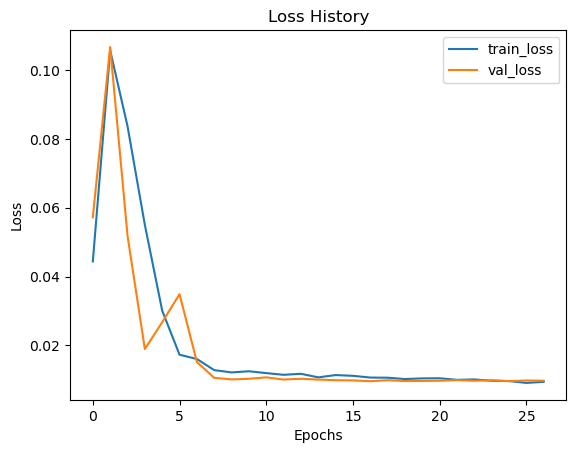

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

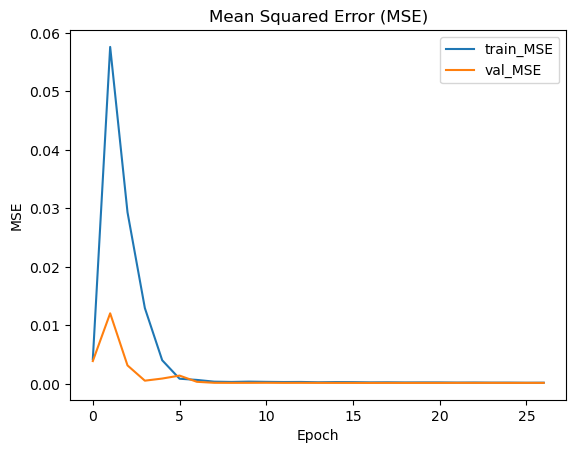

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

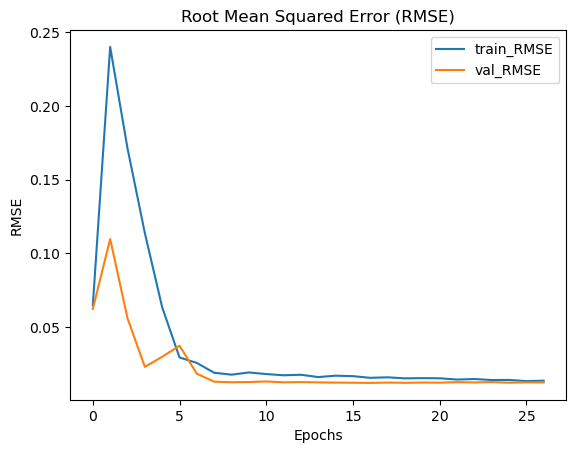

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

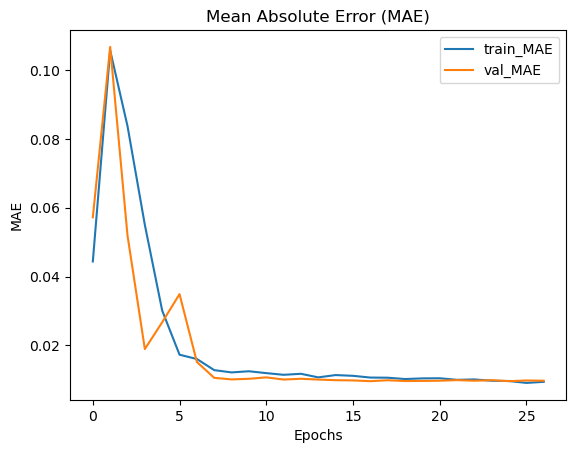

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

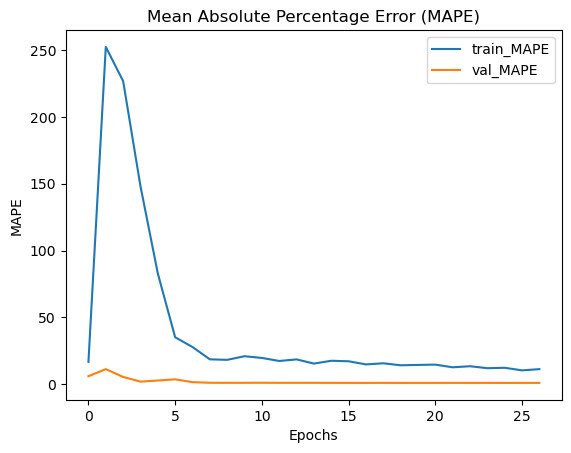

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:25:38.699719: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 2)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


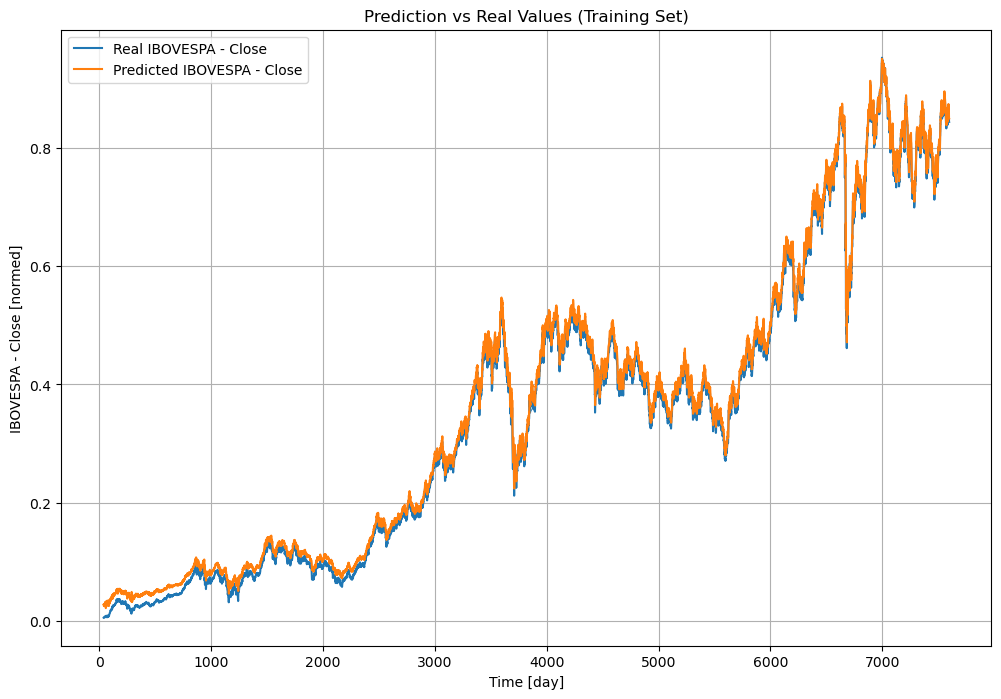

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 2)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


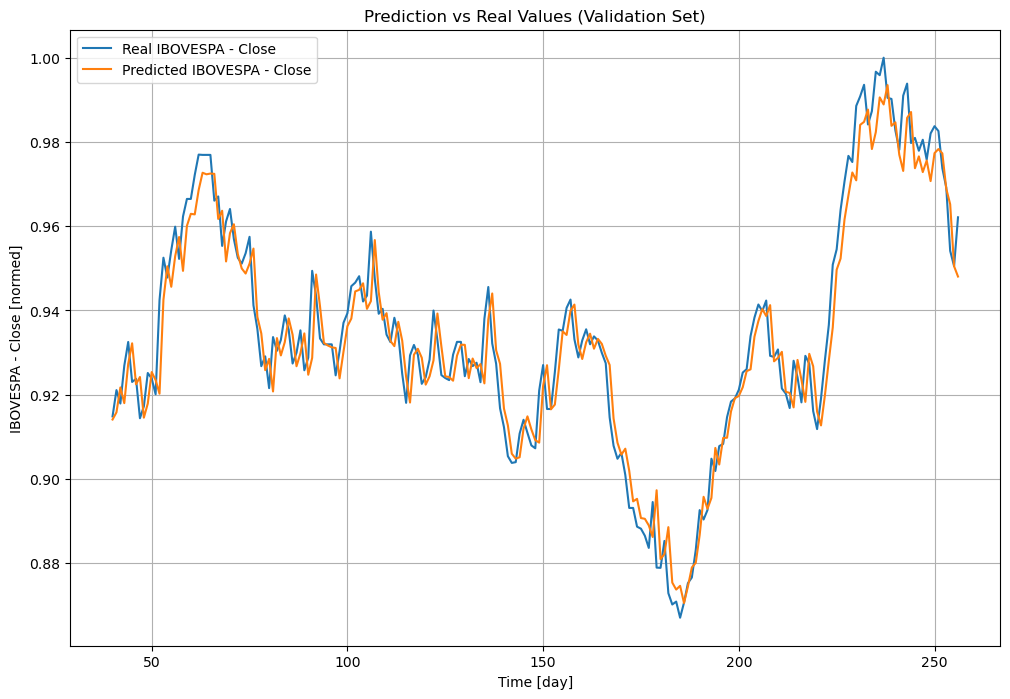

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 2)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


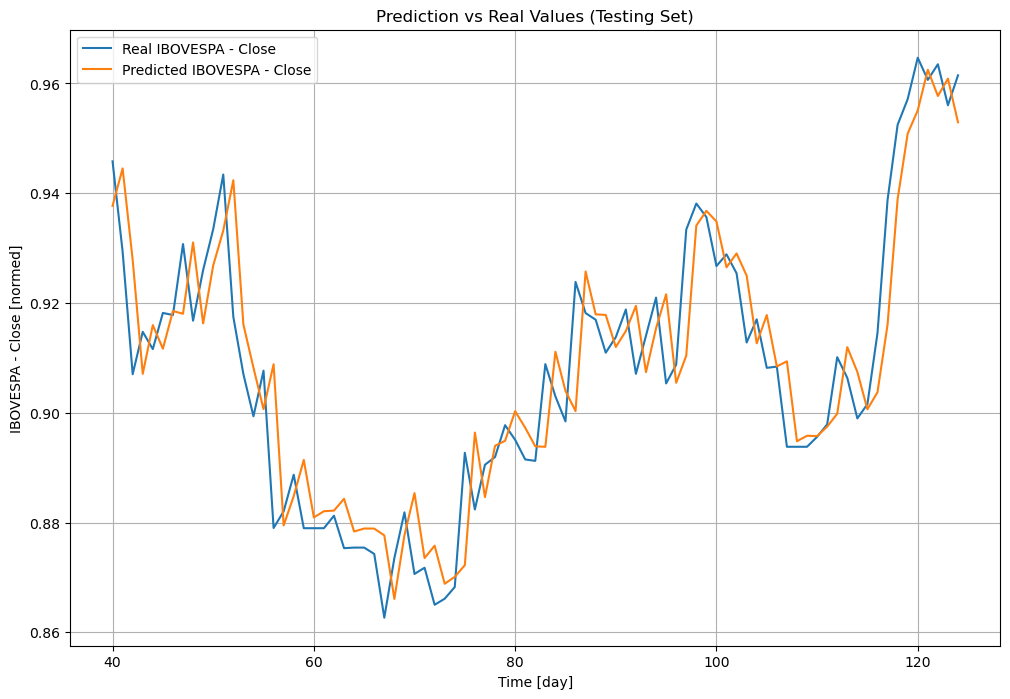

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

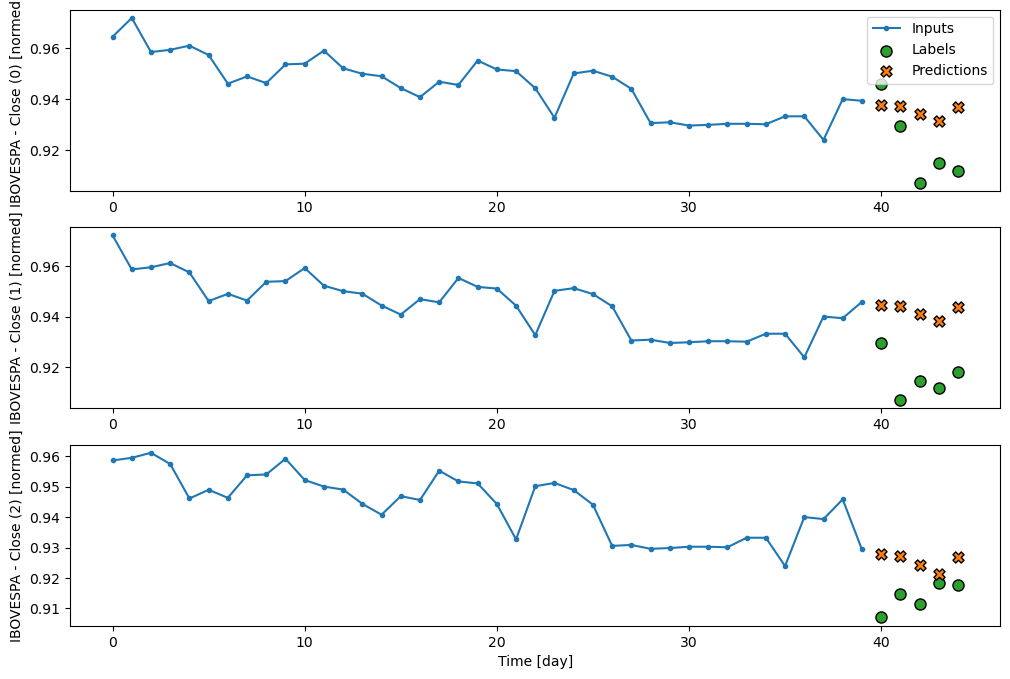

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:26s:922ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[[0.937698  , 0.937698  , 0.937698  , ..., 0.937698  ,
         0.937698  , 0.937698  ],
        [0.93719673, 0.93719673, 0.93719673, ..., 0.93719673,
         0.93719673, 0.93719673],
        [0.9342343 , 0.9342343 , 0.9342343 , ..., 0.9342343 ,
         0.9342343 , 0.9342343 ],
        [0.93150604, 0.93150604, 0.93150604, ..., 0.93150604,
         0.93150604, 0.93150604],
        [0.93699574, 0.93699574, 0.93699574, ..., 0.93699574,
         0.93699574, 0.93699574]],

       [[0.9445225 , 0.9445225 , 0.9445225 , ..., 0.9445225 ,
         0.9445225 , 0.9445225 ],
        [0.9439838 , 0.9439838 , 0.9439838 , ..., 0.9439838 ,
         0.9439838 , 0.9439838 ],
        [0.94093084, 0.94093084, 0.94093084, ..., 0.94093084,
         0.94093084, 0.94093084],
        [0.93820703, 0.93820703, 0.93820703, ..., 0.93820703,
         0.93820703, 0.93820703],
        [0.94377506, 0.94377506, 0.94377506, ..., 0.94377506,
         0.94377506, 0.94377506]],

       [[0.927845  , 0.927845  , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')